### Final project 
Rebecca McHugh

### Psuedo Code 

The main goal of this code is to import and analyze data from the air temperature sensor network in Boulder, Colorado.

1. Set working directory.

    os.path.join(et.io.HOME,'directory_name')
    
    
2. Import the files from the working directory. 

    glob(os.path.join('file_path_name', '*'))
    
    
 3. Create a function to import the csv files. 
 
     def import_csv_files(file_name): 
         pd.read_csv(file_name,
         index_col='Date Time Column Name',
         parse_dates=True)
          
    return downloaded_temp_csv
 
 
4. Import all files using a for loop. 

    files_list = {}
    for csv_path in temp_dir:
        files_list[csv_path] = import_temp_csv(csv_path)
    files_list.values()


5. Create a function to edit the files. 
    
    def edit_imported_temp_csv(imported_file):
        imported_file.drop(imported_file.columns[[]], axis=1, inplace=True
        imported_file.index.names = ['date_time']
        imported_file.columns.values[] = "temp_celsius"
        imported_file["temp_fahrenheit"] = celsius_to_fahr(
            imported_file["temp_celsius"])
        imported_file.drop(imported_file.columns[[]], axis=1, inplace=True)
    return imported_file
    
    
6. Create a function to take the daily mean temperature.

    def daily_mean (imported_file):
        imported_file.resample('D').mean()
 
 
7. Create a GeoDataFrame with all the locations of the sensors. 

    pd.DataFrame(
    {'sensor_name': [], 'latitude': [], 'longitude': []})
    
 
8. Use functions to create a number of different plots. 


9. Create a map with all the sensor locations on it. 

    folium.Map(
        location=[City],
        zoom_start=12,
        tiles='Stamen terrain')
        
    for site_location, site_df in site_list.groupby('sensor_location'):
        print([site_df.latitude.unique(), site_df.longitude.unique()])
        (folium.Marker([site_df.latitude.unique(), site_df.longitude.unique()])
         .add_to(map))

In [115]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import geopandas as gpd
import folium
import seaborn as sns

In [2]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/earth-analytics/data'

In [3]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('temperature-data', '*'))
temp_dir

['temperature-data/#008 2022-11-11 09_30_30 MST (Data MST).csv',
 'temperature-data/#041 2022-11-17 12_40_44 MST (Data MST).csv',
 'temperature-data/#035 2022-11-11 10_11_52 MST (Data MST).csv',
 'temperature-data/#037 2022-11-07 10_28_44 MST (Data MST).csv',
 'temperature-data/#011 2022-11-11 16_02_23 MST (Data MST).csv',
 'temperature-data/#006 2022-11-11 11_15_51 MST (Data MST).csv',
 'temperature-data/#009 2022-11-11 09_38_41 MST (Data MST).csv',
 'temperature-data/#004 2022-11-11 10_52_49 MST (Data MST).csv',
 'temperature-data/monthly_temps_env_vars_all.csv',
 'temperature-data/#022 2022-11-11 12_11_57 MST (Data MST).csv',
 'temperature-data/#018 2022-11-11 13_23_57 MST (Data MST).csv',
 'temperature-data/#036 2022-11-11 10_19_19 MST (Data MST).csv',
 'temperature-data/#017 replacement  2022-11-11 16_11_43 MST (Data MST).csv',
 'temperature-data/#019 replacement  2022-11-11 13_12_35 MST (Data MST).csv',
 'temperature-data/#043 2022-11-07 09_56_38 MST (Data MST).csv',
 'temperatur

In [4]:
# Import one csv file.
def import_temp_csv(file_name):
    """
    Download an air temperature csv file.

    Function will allow a different csv file to be downloaded and edited to 
    required specifications.

    Paramterers.
    ----------
    file_name : str
      The name of the file.

    Returns
    --------
    Imported csv. 
        The requested and edited csv file.
    """
                                                                                                        
    # Read csv and make the date time column the index.
    downloaded_temp_csv = pd.read_csv(file_name,
                                      index_col='Date-Time (MST/MDT)',
                                      parse_dates=True)
    return downloaded_temp_csv


sensor_001 = import_temp_csv(
    'temperature-data/#001 2022-11-11 10_28_13 MST (Data MST).csv')
sensor_002 = import_temp_csv(
    'temperature-data/#002 2022-11-11 10_36_26 MST (Data MST).csv')
sensor_003 = import_temp_csv(
    'temperature-data/#003 2022-11-11 10_47_00 MST (Data MST).csv')
sensor_004 = import_temp_csv(
    'temperature-data/#004 2022-11-11 10_52_49 MST (Data MST).csv')
sensor_005 = import_temp_csv(
    'temperature-data/#005 2022-11-11 11_20_41 MST (Data MST).csv')
sensor_006 = import_temp_csv(
    'temperature-data/#006 2022-11-11 11_15_51 MST (Data MST).csv')
sensor_007 = import_temp_csv(
    'temperature-data/#007 2022-11-11 11_03_24 MST (Data MST).csv')
sensor_008 = import_temp_csv(
    'temperature-data/#008 2022-11-11 09_30_30 MST (Data MST).csv')
sensor_009 = import_temp_csv(
    'temperature-data/#009 2022-11-11 09_38_41 MST (Data MST).csv')
sensor_010 = import_temp_csv(
    'temperature-data/#010 2022-11-11 16_21_51 MST (Data MST).csv')
sensor_011 = import_temp_csv(
     'temperature-data/#011 2022-11-11 16_02_23 MST (Data MST).csv')
sensor_012 = import_temp_csv(
    'temperature-data/#012 2022-11-11 15_53_42 MST (Data MST).csv')
sensor_013 = import_temp_csv(
    'temperature-data/#013 2022-11-11 15_45_03 MST (Data MST).csv')
sensor_014 = import_temp_csv(
    'temperature-data/#014 2022-11-11 13_55_43 MST (Data MST).csv')
sensor_015 = import_temp_csv(
    'temperature-data/#015 2022-11-11 14_04_39 MST (Data MST).csv')
sensor_017 = import_temp_csv(
    'temperature-data/#017 replacement  2022-11-11 16_11_43 MST (Data MST)'
    '.csv')
sensor_018 = import_temp_csv(
    'temperature-data/#018 2022-11-11 13_23_57 MST (Data MST).csv')
sensor_019 = import_temp_csv(
    'temperature-data/#019 replacement  2022-11-11 13_12_35 MST (Data MST)'
    '.csv')
sensor_022 = import_temp_csv(
    'temperature-data/#022 2022-11-11 12_11_57 MST (Data MST).csv')
sensor_026 = import_temp_csv(
    'temperature-data/#026 2022-11-16 14_20_18 MST (Data MST).csv')
sensor_028 = import_temp_csv(
    'temperature-data/#028 2022-11-11 15_35_31 MST (Data MST).csv')
sensor_029 = import_temp_csv(
    'temperature-data/#029 2022-11-11 13_37_51 MST (Data MST).csv')
sensor_030 = import_temp_csv(
     'temperature-data/#030 2022-11-11 16_29_14 MST (Data MST).csv',)
sensor_031 = import_temp_csv(
    'temperature-data/#031 2022-11-11 10_02_58 MST (Data MST).csv')
sensor_035 = import_temp_csv(
    'temperature-data/#035 2022-11-11 10_11_52 MST (Data MST).csv')
sensor_036 = import_temp_csv(
    'temperature-data/#036 2022-11-11 10_19_19 MST (Data MST).csv')
sensor_037 = import_temp_csv(
     'temperature-data/#037 2022-11-07 10_28_44 MST (Data MST).csv')
sensor_039 =  import_temp_csv(
    'temperature-data/#039 2022-11-11 15_37_26 MST (Data MST).csv')
sensor_040 = import_temp_csv(
    'temperature-data/#040 2022-11-11 09_58_05 MST (Data MST).csv')
sensor_041 = import_temp_csv(
    'temperature-data/#041 2022-11-17 12_40_44 MST (Data MST).csv')
sensor_042 = import_temp_csv(
    'temperature-data/#042 2022-11-17 12_31_34 MST (Data MST).csv')
sensor_043 = import_temp_csv(
    'temperature-data/#043 2022-11-07 09_56_38 MST (Data MST).csv')

In [20]:
# Import all the sensors using a for loop.
files_list = {}
for csv_path in temp_dir:
    files_list[csv_path] = import_temp_csv(csv_path)
files_list.values()

dict_values([                         #  Ch: 1 - Temperature   (°C ) Host Connected  \
Date-Time (MST/MDT)                                                      
2022-05-24 17:00:18      1                          NaN         Logged   
2022-05-26 08:00:00      2                        22.48            NaN   
2022-05-26 08:05:00      3                        22.39            NaN   
2022-05-26 08:10:00      4                        22.35            NaN   
2022-05-26 08:15:00      5                        22.35            NaN   
...                    ...                          ...            ...   
2022-11-11 09:10:00  48705                        -5.24            NaN   
2022-11-11 09:15:00  48706                        -5.07            NaN   
2022-11-11 09:20:00  48707                        -4.89            NaN   
2022-11-11 09:25:00  48708                        -4.55            NaN   
2022-11-11 09:27:45  48709                          NaN         Logged   

                    End 

In [5]:
# Function to convert celsius to fahrenheit.
def celsius_to_fahr(temp_c):
    """Convert celsius to fahrenheit."""
    temp_fahr = (temp_c * 1.8) + 32
    return temp_fahr

In [6]:
# Create a function to edit imported csv.
def edit_imported_temp_csv(sensor_number):
    """Edit sensor data to the correct parameters."""
    # Delete unnecessary columns.
    sensor_number.drop(sensor_number.columns[[0, 2, 3]], axis=1, inplace=True)
    # Rename column headers.
    sensor_number.index.names = ['date_time']
    sensor_number.columns.values[0] = "temp_celsius"
    # Convert degrees celsius to degrees fahrenheit.
    sensor_number["temp_fahrenheit"] = celsius_to_fahr(
        sensor_number["temp_celsius"])
    # Remove temp_celsius column.
    sensor_number.drop(sensor_number.columns[[0]], axis=1, inplace=True)
    # Add in column to display the sensor number
    # sensor_number['sensor_name'] = name_of_sensor_df
    return sensor_number


edit_imported_temp_csv(sensor_001)
edit_imported_temp_csv(sensor_002)
edit_imported_temp_csv(sensor_003)
edit_imported_temp_csv(sensor_004)
edit_imported_temp_csv(sensor_005)
edit_imported_temp_csv(sensor_006)
edit_imported_temp_csv(sensor_007)
edit_imported_temp_csv(sensor_008)
edit_imported_temp_csv(sensor_009)
edit_imported_temp_csv(sensor_010)
edit_imported_temp_csv(sensor_011)
edit_imported_temp_csv(sensor_012)
edit_imported_temp_csv(sensor_013)
edit_imported_temp_csv(sensor_014)
edit_imported_temp_csv(sensor_015)
#edit_imported_temp_csv(sensor_016)
edit_imported_temp_csv(sensor_017)
edit_imported_temp_csv(sensor_018)
edit_imported_temp_csv(sensor_019)
#edit_imported_temp_csv(sensor_020)
#edit_imported_temp_csv(sensor_021)
edit_imported_temp_csv(sensor_022)
#edit_imported_temp_csv(sensor_023)
#edit_imported_temp_csv(sensor_024)
#edit_imported_temp_csv(sensor_025)
edit_imported_temp_csv(sensor_026)
#edit_imported_temp_csv(sensor_027)
edit_imported_temp_csv(sensor_028)
edit_imported_temp_csv(sensor_029)
edit_imported_temp_csv(sensor_030)
edit_imported_temp_csv(sensor_031)
#edit_imported_temp_csv(sensor_032)
#edit_imported_temp_csv(sensor_033)
#edit_imported_temp_csv(sensor_034)
edit_imported_temp_csv(sensor_035)
edit_imported_temp_csv(sensor_036)
edit_imported_temp_csv(sensor_037)
#edit_imported_temp_csv(sensor_038)
edit_imported_temp_csv(sensor_039)
edit_imported_temp_csv(sensor_040)
edit_imported_temp_csv(sensor_041)
edit_imported_temp_csv(sensor_042)
edit_imported_temp_csv(sensor_043)

temp_fahrenheit
date_time                           
2022-06-20 16:05:00           75.092
2022-06-20 16:10:00           75.776
2022-06-20 16:15:00           75.704
2022-06-20 16:20:00           75.470
2022-06-20 16:25:00           75.092
...                              ...
2022-11-07 09:35:00           44.420
2022-11-07 09:40:00           44.744
2022-11-07 09:45:00           44.348
2022-11-07 09:50:00           44.348
2022-11-07 09:54:21              NaN

[40259 rows x 1 columns]

In [23]:
# Apply the edit csv function to all sensor dfs. 
# sensor_df_list = [sensor_001,
# sensor_002,
# sensor_003,
# sensor_004,
# sensor_005,
# sensor_006,
# sensor_007,
# sensor_008,
# sensor_009,
# sensor_010,
# sensor_011,
# sensor_012,
# sensor_013,
# sensor_014,
# sensor_015,
# sensor_017,
# sensor_018,
# sensor_019,
# sensor_022,
# sensor_026,
# sensor_028,
# sensor_029,
# sensor_030,
# sensor_031,
# sensor_035,
# sensor_036,
# sensor_037,
# sensor_039,
# sensor_041,
# sensor_042,
# sensor_043]
# new_sensor_df_list = []
# for df in sensor_df_list:
#     new_sensor_df_list.append(df.apply(edit_imported_temp_csv(sensor_df_list)))

In [7]:
# Calculate the daily mean.
def daily_mean(sensor_number):
    """Calculate the daily mean temperature of each sensor."""
    mean_temp_sensor_number = sensor_number.resample('D').mean()
    return mean_temp_sensor_number


mean_temp_sensor_002 = daily_mean(sensor_002)
mean_temp_sensor_003 = daily_mean(sensor_003)
mean_temp_sensor_043 = daily_mean(sensor_043)
mean_temp_sensor_029 = daily_mean(sensor_029)
mean_temp_sensor_029

temp_fahrenheit
date_time                  
2022-06-07        76.331563
2022-06-08        77.450625
2022-06-09        78.399875
2022-06-10        76.410813
2022-06-11        82.166813
...                     ...
2022-11-07        40.976687
2022-11-08        50.040750
2022-11-09        36.650250
2022-11-10        38.650125
2022-11-11        24.741610

[158 rows x 1 columns]

In [8]:
# Create a gdf of the sensor name and location.
sensor_sites_list = pd.DataFrame(
    {'sensor_name': ['sensor_001',
                     'sensor_002',
                     'sensor_003',
                     'sensor_004',
                     'sensor_005',
                     'sensor_006',
                     'sensor_007',
                     'sensor_008',
                     'sensor_009',
                     'sensor_010',
                     'sensor_011',
                     'sensor_012',
                     'sensor_013',
                     'sensor_014',
                     'sensor_015',
                     'sensor_016',
                     'sensor_017',
                     'sensor_018',
                     'sensor_019',
                     'sensor_020',
                     'sensor_021',
                     'sensor_022',
                     'sensor_023',
                     'sensor_024',
                     'sensor_025',
                     'sensor_026',
                     'sensor_027',
                     'sensor_028',
                     'sensor_029',
                     'sensor_030',
                     'sensor_031',
                     'sensor_032',
                     'sensor_033',
                     'sensor_034',
                     'sensor_035',
                     'sensor_036',
                     'sensor_037',
                     'sensor_038',
                     'sensor_039',
                     'sensor_040',
                     'sensor_041',
                     'sensor_042',
                     'sensor_043'],
     'latitude': [40.01529,
                  40.02051,
                  40.0272858,
                  40.0288062,
                  40.056943,
                  40.05773,
                  40.05564,
                  40.00722,
                  40.0090042,
                  39.97694,
                  39.99494,
                  39.99988,
                  40.0028563,
                  40.01493,
                  40.01512,
                  40.0731603,
                  39.98402,
                  40.03176,
                  40.044624,
                  40.043928,
                  40.086,
                  40.054629,
                  40.07784,
                  40.064132,
                  40.06213,
                  40.0332328,
                  40.01667,
                  40.0111700,
                  40.018508,
                  39.9730290,
                  40.0118932,
                  39.99735,
                  39.9987025,
                  39.9999017,
                  40.0139711,
                  40.0134418,
                  39.934941,
                  40.037323,
                  40.026377,
                  40.0120372,
                  40.21291,
                  40.04429,
                  40.0257],
     'longitude': [-105.28639,
                   -105.29113,
                   -105.2872161,
                   -105.2875383,
                   -105.290043,
                   -105.2883,
                   -105.28424,
                   -105.27949,
                   -105.2843139,
                   -105.26022,
                   -105.23594,
                   -105.22941,
                   -105.2516369,
                   -105.23615,
                   -105.22528,
                   -105.2020412,
                   -105.23961,
                   -105.24959,
                   -105.246515,
                   -105.244840,
                   -105.21118,
                   -105.262655,
                   -105.28233,
                   -105.284495,
                   -105.28199,
                   -105.2754479,
                   -105.2504,
                   -105.2542729,
                   -105.256018,
                   -105.2495512,
                   -105.2675196,
                   -105.29921,
                   -105.2959701,
                   -105.2957703,
                   -105.2850948,
                   -105.2941583,
                   -105.266901,
                   -105.292483,
                   -105.224478,
                   -105.2723530,
                   -105.27719,
                   -105.29278,
                   -105.2898]})
sensor_sites_list.set_index('sensor_name', inplace=True)

sensor_sites_list.head()

latitude   longitude
sensor_name                       
sensor_001   40.015290 -105.286390
sensor_002   40.020510 -105.291130
sensor_003   40.027286 -105.287216
sensor_004   40.028806 -105.287538
sensor_005   40.056943 -105.290043

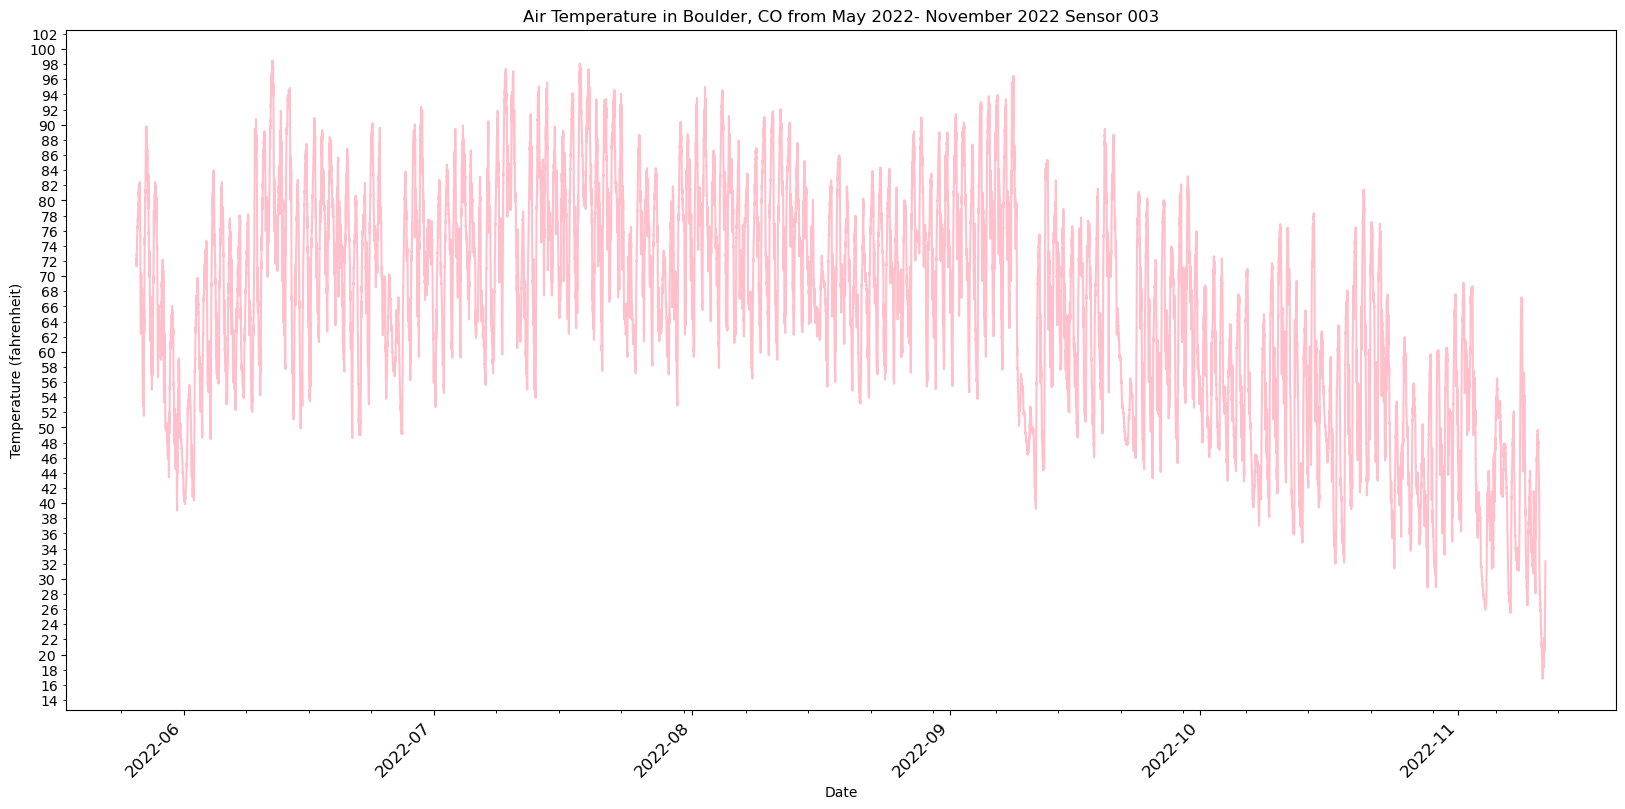

In [9]:
# Create a plot for air temperature for each reading.
def plot_temp_minute(sensor_number, title):
    # Create plot layout.
    ig, (ax1) = plt.subplots(
        1, figsize=(20, 10))
    ax = ax1
    # Add information to plot.
    sensor_number['temp_fahrenheit'].plot(
        ax=ax1,
        rot=60,
        title=title,
        xlabel='Date',
        ylabel='Temperature (fahrenheit)',
        color='pink',
        legend='')
    # Adjust tick marks on the x-axis.
    ax1.tick_params(axis='x', labelrotation=45, labelsize='large')
    # Add minor ticks in between larger ticks and label minor ticks.
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.f"))
    # Add more ticks for the date axis.


plot_temp_minute(sensor_003,
                 'Air Temperature in Boulder, CO from May 2022'
                 '- November 2022 Sensor 003')

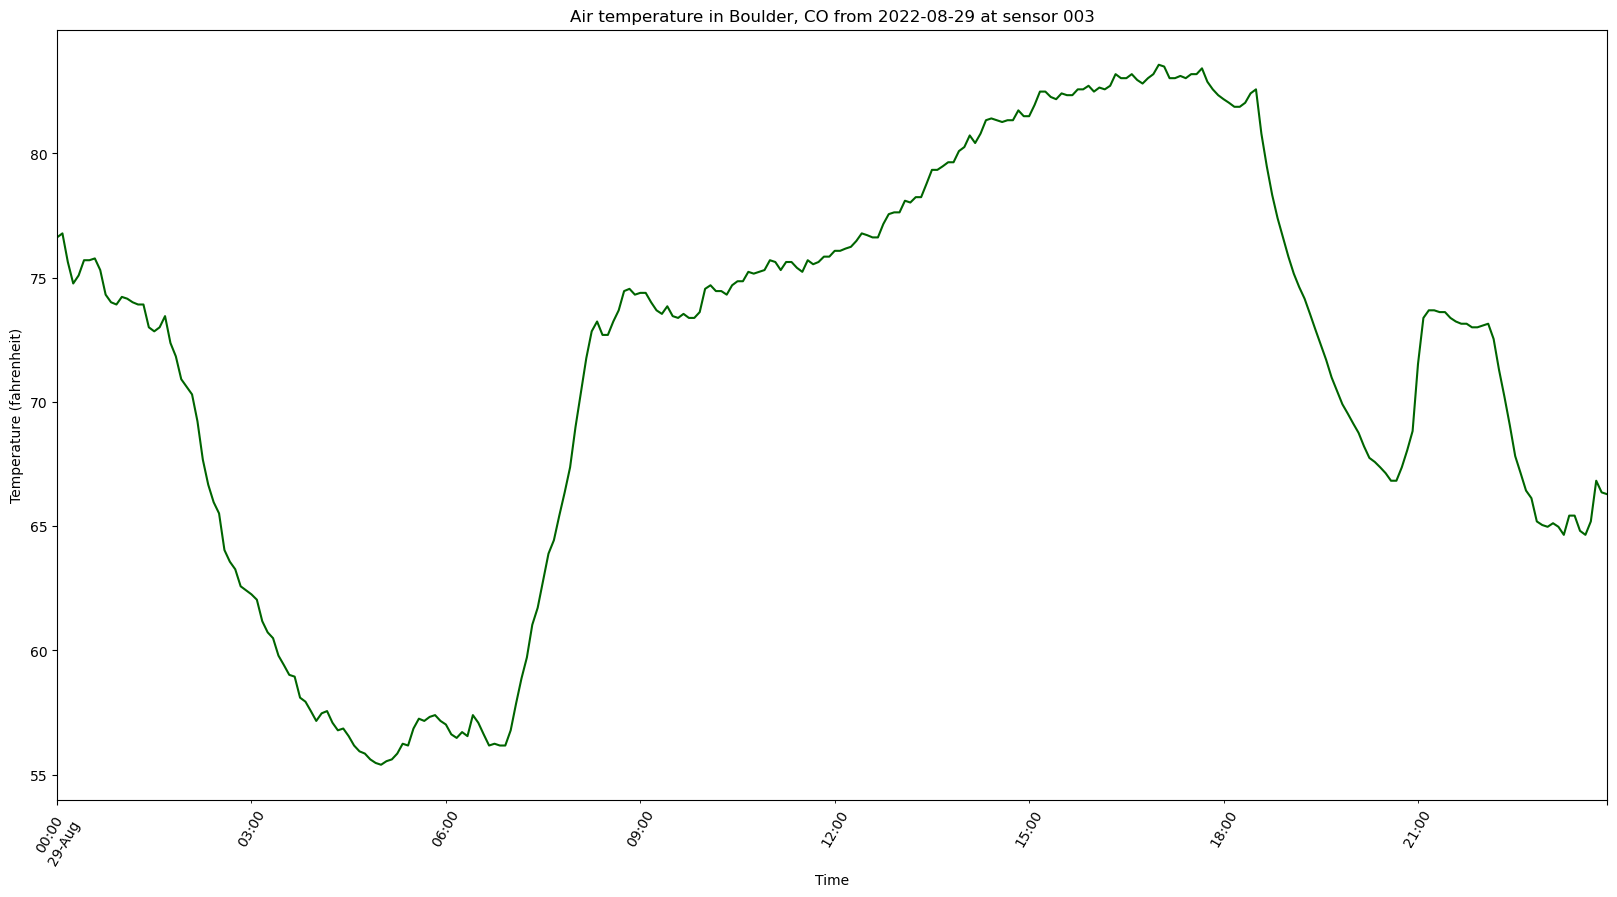

In [10]:
# Create a plot to graph just a single day.
def plot_temp_subset_date(sensor_number, date, title):
    # Subset the data to preferred number
    sensor_subset = sensor_number.loc[date]
    # Create plot layout.
    ig, (ax1) = plt.subplots(
        1, figsize=(20, 10))
    ax = ax1
    # Add information to plot.
    sensor_subset['temp_fahrenheit'].plot(
        ax=ax1,
        rot=60,
        title=title,
        xlabel='Time',
        ylabel='Temperature (fahrenheit)',
        color='darkgreen',
        legend='')


plot_temp_subset_date(sensor_003,
                      '2022-08-29',
                      'Air temperature in Boulder, CO'
                      ' from 2022-08-29 at sensor 003')

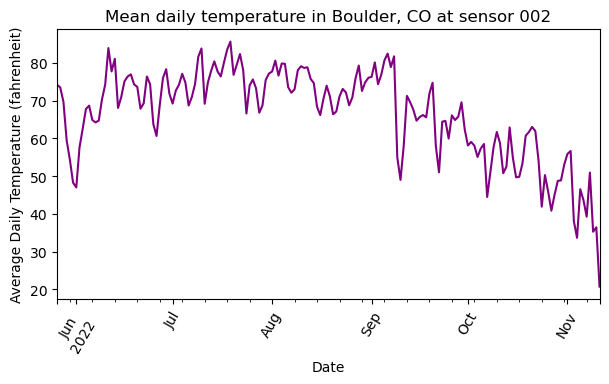

In [11]:
# Create a graph to plot the daily average mean.
def plot_daily_mean(daily_mean_sensor_number, title):
    (fig, ax) = plt.subplots(1, 1, figsize=[7.00, 3.50])
    daily_mean_sensor_number['temp_fahrenheit'].plot(
        ax=ax,
        rot=60,
        title=title,
        xlabel='Date',
        ylabel='Average Daily Temperature (fahrenheit)',
        color='purple',
        legend='')


plot_daily_mean(mean_temp_sensor_002,
                'Mean daily temperature in Boulder, CO at sensor 002')

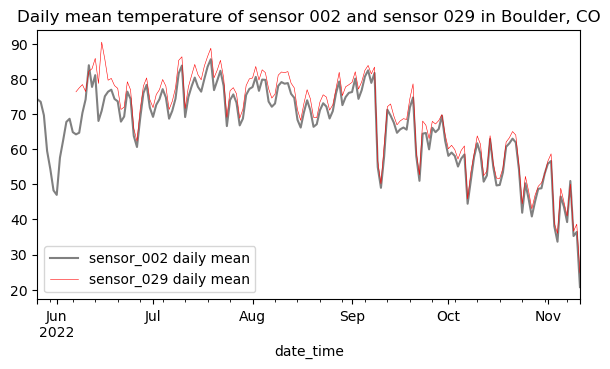

In [12]:
# Create one plot with two sensors
def plot_temp_minute_two(sensor_number_1,
                         sensor_number_2,
                         label_sensor_1,
                         label_sensor_2,
                         title):
    (fig, ax) = plt.subplots(1, 1, figsize=[7.00, 3.50])

    df1 = sensor_number_1
    df2 = sensor_number_2

    df1.plot(y='temp_fahrenheit', ax=ax, color='grey', label=label_sensor_1)
    df2.plot(y='temp_fahrenheit', ax=ax, color='red', label=label_sensor_2,
             linewidth=0.4,
             title=title)

    plt.show()


plot_temp_minute_two(mean_temp_sensor_002,
                     mean_temp_sensor_029,
                     'sensor_002 daily mean',
                     'sensor_029 daily mean',
                     'Daily mean temperature of sensor 002 and sensor 029'
                     ' in Boulder, CO')

In [13]:
# Create a map of the sensors.
sensor_map = folium.Map(
    location=[40.0150, -105.2705],
    zoom_start=12,
    tiles='Stamen terrain')
# Add sensor locations to map.
for sensor_name, site_df in sensor_sites_list.groupby('sensor_name'):
    print([site_df.latitude.unique(), site_df.longitude.unique()])
    (folium.Marker([site_df.latitude.unique(), site_df.longitude.unique()])
     .add_to(sensor_map))
sensor_map

[array([40.01529]), array([-105.28639])]
[array([40.02051]), array([-105.29113])]
[array([40.0272858]), array([-105.2872161])]
[array([40.0288062]), array([-105.2875383])]
[array([40.056943]), array([-105.290043])]
[array([40.05773]), array([-105.2883])]
[array([40.05564]), array([-105.28424])]
[array([40.00722]), array([-105.27949])]
[array([40.0090042]), array([-105.2843139])]
[array([39.97694]), array([-105.26022])]
[array([39.99494]), array([-105.23594])]
[array([39.99988]), array([-105.22941])]
[array([40.0028563]), array([-105.2516369])]
[array([40.01493]), array([-105.23615])]
[array([40.01512]), array([-105.22528])]
[array([40.0731603]), array([-105.2020412])]
[array([39.98402]), array([-105.23961])]
[array([40.03176]), array([-105.24959])]
[array([40.044624]), array([-105.246515])]
[array([40.043928]), array([-105.24484])]
[array([40.086]), array([-105.21118])]
[array([40.054629]), array([-105.262655])]
[array([40.07784]), array([-105.28233])]
[array([40.064132]), array([-105.

In [14]:
# Function to take the min, max, and mean of each sensor on a monthly basis. 
def monthly_mean_min_max(sensor_number, sensor_number_column):
    """Calculate the monthly mean, min, and max temperature of each sensor."""
    temps_sensor_number = sensor_number.resample('M').agg(['min','max', 'mean'])
    #temps_sensor_number.loc[sensor_number_column] = [temps_sensor_number_row, temps_sensor_number_row, temps_sensor_number_row]
    temps_sensor_number['sensor_number']= sensor_number_column
    return temps_sensor_number
monthly_mean_min_max(sensor_009, 'sensor_009')

temp_fahrenheit                    sensor_number
                       min     max       mean              
date_time                                                  
2022-05-31          39.722  86.666  61.794533    sensor_009
2022-06-30          39.632  98.402  69.021650    sensor_009
2022-07-31          52.772  95.702  74.135554    sensor_009
2022-08-31          52.070  93.146  72.242200    sensor_009
2022-09-30          40.262  94.082  65.224398    sensor_009
2022-10-31          29.912  79.250  51.440133    sensor_009
2022-11-30          16.466  67.046  41.009078    sensor_009

In [15]:
# Run the monthly temps for all the sensors. 
monthly_temps_sensor_001 = monthly_mean_min_max(sensor_001, 'sensor_001')
monthly_temps_sensor_002 = monthly_mean_min_max(sensor_002, 'sensor_002')
monthly_temps_sensor_003 = monthly_mean_min_max(sensor_003, 'sensor_003')
monthly_temps_sensor_004 = monthly_mean_min_max(sensor_004, 'sensor_004')
monthly_temps_sensor_005 = monthly_mean_min_max(sensor_005, 'sensor_005')
monthly_temps_sensor_006 = monthly_mean_min_max(sensor_006, 'sensor_006')
monthly_temps_sensor_007 = monthly_mean_min_max(sensor_007, 'sensor_007')
monthly_temps_sensor_008 = monthly_mean_min_max(sensor_008, 'sensor_008')
monthly_temps_sensor_009 = monthly_mean_min_max(sensor_009, 'sensor_009')
monthly_temps_sensor_010 = monthly_mean_min_max(sensor_010, 'sensor_010')
monthly_temps_sensor_011 = monthly_mean_min_max(sensor_011, 'sensor_011')
monthly_temps_sensor_012 = monthly_mean_min_max(sensor_012, 'sensor_012')
monthly_temps_sensor_013 = monthly_mean_min_max(sensor_013, 'sensor_013')
monthly_temps_sensor_014 = monthly_mean_min_max(sensor_014, 'sensor_014')
monthly_temps_sensor_015 = monthly_mean_min_max(sensor_015, 'sensor_015')
monthly_temps_sensor_017 = monthly_mean_min_max(sensor_017, 'sensor_017')
monthly_temps_sensor_018 = monthly_mean_min_max(sensor_018, 'sensor_018')
monthly_temps_sensor_019 = monthly_mean_min_max(sensor_019, 'sensor_019')
monthly_temps_sensor_022 = monthly_mean_min_max(sensor_022, 'sensor_022')
monthly_temps_sensor_026 = monthly_mean_min_max(sensor_026, 'sensor_026')
monthly_temps_sensor_028 = monthly_mean_min_max(sensor_028, 'sensor_028')
monthly_temps_sensor_029 = monthly_mean_min_max(sensor_029, 'sensor_029')
monthly_temps_sensor_030 = monthly_mean_min_max(sensor_030, 'sensor_030')
monthly_temps_sensor_031 = monthly_mean_min_max(sensor_031, 'sensor_031')
monthly_temps_sensor_035 = monthly_mean_min_max(sensor_035, 'sensor_035')
monthly_temps_sensor_036 = monthly_mean_min_max(sensor_036, 'sensor_036')
monthly_temps_sensor_037 = monthly_mean_min_max(sensor_037, 'sensor_037')
monthly_temps_sensor_039 = monthly_mean_min_max(sensor_039, 'sensor_039')
monthly_temps_sensor_040 = monthly_mean_min_max(sensor_040, 'sensor_040')
monthly_temps_sensor_041 = monthly_mean_min_max(sensor_041, 'sensor_041')
monthly_temps_sensor_042 = monthly_mean_min_max(sensor_042, 'sensor_042')
monthly_temps_sensor_043 = monthly_mean_min_max(sensor_043, 'sensor_043')

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_7522/3381603365.py:4: FutureWarning: ['End of File'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temps_sensor_number = sensor_number.resample('M').agg(['min','max', 'mean'])


In [16]:
# Create a list of all the dataframes with the monthly temps.
monthly_temps_all_list = [
monthly_temps_sensor_001,
monthly_temps_sensor_002,
monthly_temps_sensor_003,
monthly_temps_sensor_004,
monthly_temps_sensor_005,
monthly_temps_sensor_006,
monthly_temps_sensor_007,
monthly_temps_sensor_008,
monthly_temps_sensor_009,
monthly_temps_sensor_010,
monthly_temps_sensor_011,
monthly_temps_sensor_012,
monthly_temps_sensor_013,
monthly_temps_sensor_014,
monthly_temps_sensor_015,
#monthly_temps_sensor_016,
#monthly_temps_sensor_017,
monthly_temps_sensor_018,
monthly_temps_sensor_019,
#monthly_temps_sensor_020,
#monthly_temps_sensor_021,
monthly_temps_sensor_022,
#monthly_temps_sensor_023,
#monthly_temps_sensor_024,
#monthly_temps_sensor_025,
monthly_temps_sensor_026,
#monthly_temps_sensor_027,
monthly_temps_sensor_028,
monthly_temps_sensor_029,
monthly_temps_sensor_030,
monthly_temps_sensor_031,
#monthly_temps_sensor_032,
#monthly_temps_sensor_033,
#monthly_temps_sensor_034,
monthly_temps_sensor_035,
monthly_temps_sensor_036,
monthly_temps_sensor_037,
#monthly_temps_sensor_038,
monthly_temps_sensor_039,
monthly_temps_sensor_040,
monthly_temps_sensor_041,
monthly_temps_sensor_042,
monthly_temps_sensor_043]

monthly_temps_all_df= pd.concat(monthly_temps_all_list)
print('\n Concatenated Output  \n' ,monthly_temps_all_df) 


 Concatenated Output  
            temp_fahrenheit                     sensor_number
                       min      max       mean              
date_time                                                   
2022-05-31          41.576   88.592  62.892246    sensor_001
2022-06-30          40.100   99.644  70.320619    sensor_001
2022-07-31          57.092   97.016  75.209609    sensor_001
2022-08-31          57.092   94.388  73.811440    sensor_001
2022-09-30          42.116   94.010  67.688396    sensor_001
...                    ...      ...        ...           ...
2022-07-31          48.596  106.970  72.760079    sensor_043
2022-08-31          49.064  100.868  71.174238    sensor_043
2022-09-30          37.328  103.190  62.579467    sensor_043
2022-10-31          23.108   84.974  48.378421    sensor_043
2022-11-30          20.642   75.164  40.332247    sensor_043

[203 rows x 4 columns]


In [34]:
# Export csv file for adding enviormental variables. 
monthly_temps_all_df.to_csv('/Users/rebeccamchugh/earth-analytics/data\monthly_temps_all_csv.csv')

In [17]:
# Bring edited csv file back. 
unnamed_monthly_temps_env_vars_all = pd.read_csv('temperature-data/monthly_temps_env_vars_all.csv',
                                        index_col=0,parse_dates=True)
monthly_temps_env_vars_all = unnamed_monthly_temps_env_vars_all.rename(columns={"Unnamed: 1": "min",
                                           "Unnamed: 2": "max",
                                           "Unnamed: 3": "mean",
                                           "Unnamed: 4": "sensor_number",
                                           "Unnamed: 5": "LULC_NLCD_2016",
                                           "Unnamed: 6": "cc_per_30m",
                                           "Unnamed: 7": "ic_per_30m"})
monthly_temps_env_vars_all.drop(index=monthly_temps_env_vars_all.index[0], axis=0, inplace=True)
monthly_temps_env_vars_all.drop(index=monthly_temps_env_vars_all.index[0], axis=0, inplace=True)
monthly_temps_env_vars_all.index.name = 'month'
monthly_temps_env_vars_all

min      max         mean sensor_number LULC_NLCD_2016  \
month                                                                 
5/31/22   41.576   88.592  62.89224632    sensor_001             22   
6/30/22     40.1   99.644  70.32061875    sensor_001             22   
7/31/22   57.092   97.016  75.20960887    sensor_001             22   
8/31/22   57.092   94.388  73.81143952    sensor_001             22   
9/30/22   42.116    94.01  67.68839583    sensor_001             22   
...          ...      ...          ...           ...            ...   
7/31/22   48.596   106.97  72.76007863    sensor_043             22   
8/31/22   49.064  100.868   71.1742379    sensor_043             22   
9/30/22   37.328   103.19  62.57946667    sensor_043             22   
10/31/22  23.108   84.974  48.37842137    sensor_043             22   
11/30/22  20.642   75.164  40.33224744    sensor_043             22   

         cc_per_30m ic_per_30m  
month                           
5/31/22    30.47213   0.363728  
6/30/22    30.47213   0.363728  
7/31/22    30.47213   0.363728  
8/31/22    30.47213   0.363728  
9/30/22    30.47213   0.363728  
...             ...        ...  
7/31/22    33.27364   0.526808  
8/31/22    33.27364   0.526808  
9/30/22    33.27364   0.526808  
10/31/22   33.27364   0.526808  
11/30/22   33.27364   0.526808  

[207 rows x 7 columns]

In [ ]:
# Change the data to numerical instead of objects
monthly_temps_env_vars_all['min']=monthly_temps_env_vars_all['min'].astype(float)
monthly_temps_env_vars_all['max']=monthly_temps_env_vars_all['max'].astype(float)
monthly_temps_env_vars_all['mean']=monthly_temps_env_vars_all['mean'].astype(float)
#monthly_temps_env_vars_all['sensor_number']=monthly_temps_env_vars_all['sensor_number'].astype(float)
monthly_temps_env_vars_all['LULC_NLCD_2016']=monthly_temps_env_vars_all['LULC_NLCD_2016'].astype(float)
monthly_temps_env_vars_all['cc_per_30m']=monthly_temps_env_vars_all['cc_per_30m'].astype(float)
monthly_temps_env_vars_all['ic_per_30m']=monthly_temps_env_vars_all['ic_per_30m'].astype(float)
monthly_temps_env_vars_all.dtypes
no_index_monthly_temps_env = monthly_temps_env_vars_all.reset_index()
no_index_monthly_temps_env['month'] = pd.to_datetime(no_index_monthly_temps_env['month'])
no_index_monthly_temps_env

In [19]:
# Create a df that is grouped together by LULC
lulc_monthly_temps_all = no_index_monthly_temps_env.groupby(['LULC_NLCD_2016', 'month']).agg({'min': np.min, 'max': np.max, 'mean': np.mean})
#'Y1961': np.sum, 'Y1962': [np.sum, np.mean]
# Export to csv. 
lulc_monthly_temps_all.to_csv('/Users/rebeccamchugh/earth-analytics/data\monthly_temps_lulc_csv.csv')
lulc_monthly_temps_all

min      max       mean
LULC_NLCD_2016 month                                 
11.0           2022-06-30  50.918  120.416  75.681872
               2022-07-31  53.150  100.184  74.659113
               2022-08-31  53.996   96.476  72.526284
               2022-09-30  41.414   96.782  65.600431
               2022-10-31  28.598   80.726  52.380040
               2022-11-30  15.386   72.770  41.353190
21.0           2022-05-31  35.942   96.782  62.215827
               2022-06-30  37.400  119.786  70.231130
               2022-07-31  49.442  102.650  74.665120
               2022-08-31  50.918  101.102  72.573782
               2022-09-30  37.634   99.788  65.443370
               2022-10-31  24.422   83.354  51.720364
               2022-11-30  12.002   72.374  40.826192
22.0           2022-05-31  40.262   89.834  62.734493
               2022-06-30  39.560  121.334  71.407178
               2022-07-31  48.596  109.904  75.309286
               2022-08-31  49.064  104.504  73.400049
               2022-09-30  37.328  104.972  66.400982
               2022-10-31  23.108   87.368  52.430369
               2022-11-30  14.540   76.172  41.860866
23.0           2022-05-31  40.334   91.292  63.136676
               2022-06-30  40.874  120.794  72.055799
               2022-07-31  53.222  104.810  76.396817
               2022-08-31  52.772  101.030  74.409186
               2022-09-30  40.874  101.498  67.203445
               2022-10-31  28.130   88.142  52.976409
               2022-11-30  16.700   74.012  41.873581
52.0           2022-06-30  50.918  100.256  69.444616
               2022-07-31  53.456   93.308  72.359877
               2022-08-31  55.616   89.060  70.395893
               2022-09-30  42.188   86.972  64.001067
               2022-10-31  31.532   80.420  51.907851
               2022-11-30  25.970   72.770  44.209527
71.0           2022-05-31  39.416  101.336  61.399040
               2022-06-30  39.182   97.862  69.278628
               2022-07-31  51.926  101.030  74.453202
               2022-08-31  51.764   98.096  72.227228
               2022-09-30  39.488   96.854  64.987744
               2022-10-31  26.582   81.410  51.737200
               2022-11-30  13.766   69.836  40.771503
90.0           2022-06-30  53.384   93.542  71.282844
               2022-07-31  54.932  101.498  75.912831
               2022-08-31  56.480   97.394  74.203319
               2022-09-30  42.116  101.498  67.979629
               2022-10-31  32.144   85.820  54.278605
               2022-11-30  17.168   75.542  38.752980

In [21]:
# Clear index for groupby purposes.
lulc_no_index = lulc_monthly_temps_all.reset_index()
lulc_no_index
# Set the data frame so that the month column is formatted by date/time.
lulc_no_index['month'] = pd.to_datetime(lulc_no_index['month'])
lulc_no_index

LULC_NLCD_2016      month     min      max       mean
0             11.0 2022-06-30  50.918  120.416  75.681872
1             11.0 2022-07-31  53.150  100.184  74.659113
2             11.0 2022-08-31  53.996   96.476  72.526284
3             11.0 2022-09-30  41.414   96.782  65.600431
4             11.0 2022-10-31  28.598   80.726  52.380040
5             11.0 2022-11-30  15.386   72.770  41.353190
6             21.0 2022-05-31  35.942   96.782  62.215827
7             21.0 2022-06-30  37.400  119.786  70.231130
8             21.0 2022-07-31  49.442  102.650  74.665120
9             21.0 2022-08-31  50.918  101.102  72.573782
10            21.0 2022-09-30  37.634   99.788  65.443370
11            21.0 2022-10-31  24.422   83.354  51.720364
12            21.0 2022-11-30  12.002   72.374  40.826192
13            22.0 2022-05-31  40.262   89.834  62.734493
14            22.0 2022-06-30  39.560  121.334  71.407178
15            22.0 2022-07-31  48.596  109.904  75.309286
16            22.0 2022-08-31  49.064  104.504  73.400049
17            22.0 2022-09-30  37.328  104.972  66.400982
18            22.0 2022-10-31  23.108   87.368  52.430369
19            22.0 2022-11-30  14.540   76.172  41.860866
20            23.0 2022-05-31  40.334   91.292  63.136676
21            23.0 2022-06-30  40.874  120.794  72.055799
22            23.0 2022-07-31  53.222  104.810  76.396817
23            23.0 2022-08-31  52.772  101.030  74.409186
24            23.0 2022-09-30  40.874  101.498  67.203445
25            23.0 2022-10-31  28.130   88.142  52.976409
26            23.0 2022-11-30  16.700   74.012  41.873581
27            52.0 2022-06-30  50.918  100.256  69.444616
28            52.0 2022-07-31  53.456   93.308  72.359877
29            52.0 2022-08-31  55.616   89.060  70.395893
30            52.0 2022-09-30  42.188   86.972  64.001067
31            52.0 2022-10-31  31.532   80.420  51.907851
32            52.0 2022-11-30  25.970   72.770  44.209527
33            71.0 2022-05-31  39.416  101.336  61.399040
34            71.0 2022-06-30  39.182   97.862  69.278628
35            71.0 2022-07-31  51.926  101.030  74.453202
36            71.0 2022-08-31  51.764   98.096  72.227228
37            71.0 2022-09-30  39.488   96.854  64.987744
38            71.0 2022-10-31  26.582   81.410  51.737200
39            71.0 2022-11-30  13.766   69.836  40.771503
40            90.0 2022-06-30  53.384   93.542  71.282844
41            90.0 2022-07-31  54.932  101.498  75.912831
42            90.0 2022-08-31  56.480   97.394  74.203319
43            90.0 2022-09-30  42.116  101.498  67.979629
44            90.0 2022-10-31  32.144   85.820  54.278605
45            90.0 2022-11-30  17.168   75.542  38.752980

In [22]:
# Possibly use later for put sections in all of files
# out_list = [group[1] for group in in_series.groupby(label_series.values)]

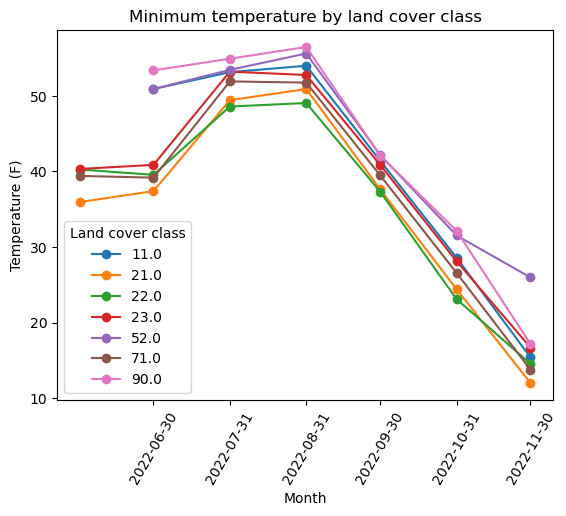

In [23]:
# Create min graph by land cover class
labels=[]
for k,v in lulc_no_index.groupby("LULC_NLCD_2016"):
    plt.plot(v["month"],v["min"],marker='o')
    labels.append(k)
    plt.legend(labels,title='Land cover class')
    plt.xticks(v["month"].unique())
    plt.title('Minimum temperature by land cover class')
    plt.xticks(rotation = 60)
    plt.ylabel('Temperature (F)')
    plt.xlabel('Month')
#plt.savefig('books_read.png')

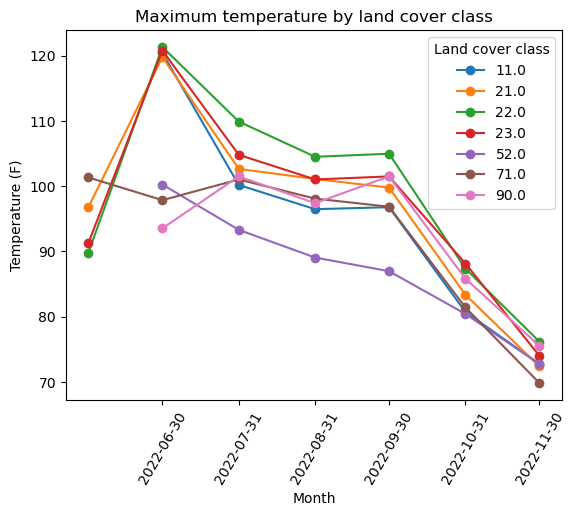

In [24]:
# Create max graph by land cover class
labels=[]
for k,v in lulc_no_index.groupby("LULC_NLCD_2016"):
    plt.plot(v["month"],v["max"],marker='o')
    labels.append(k)
    plt.legend(labels,title='Land cover class')
    plt.xticks(v["month"].unique())
    plt.title('Maximum temperature by land cover class')
    plt.xticks(rotation = 60)
    plt.ylabel('Temperature (F)')
    plt.xlabel('Month')

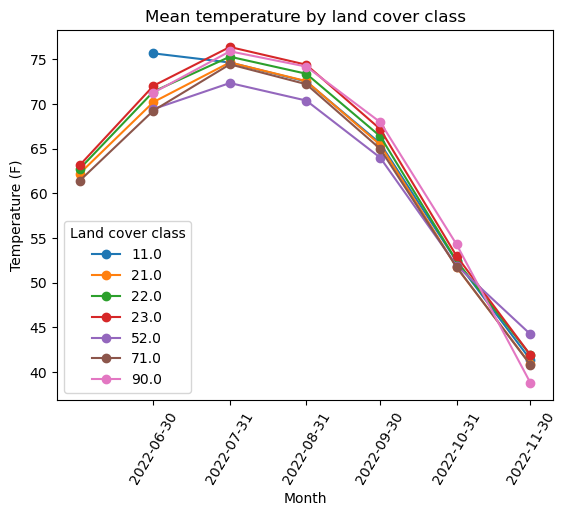

In [25]:
# Create mean graph by land cover class
labels=[]
for k,v in lulc_no_index.groupby("LULC_NLCD_2016"):
    plt.plot(v["month"],v["mean"],marker='o')
    labels.append(k)
    plt.legend(labels,title='Land cover class')
    plt.xticks(v["month"].unique())
    plt.title('Mean temperature by land cover class')
    plt.xticks(rotation = 60)
    plt.ylabel('Temperature (F)')
    plt.xlabel('Month')

In [41]:
# Edit the files so that each is by day and night 
def day_night_temps(df, sensor_number):
    df.index = pd.to_datetime(df.index)
    df['Time of Day'] = 'Day'
    df.loc[(df.index.hour >= 19) | (df.index.hour <= 6), 'Time of Day'] = 'Night'
    df['sensor_number'] = sensor_number
    return df

In [42]:
day_night_temps(sensor_001, 'sensor_001')
day_night_temps(sensor_002, 'sensor_002')
day_night_temps(sensor_003, 'sensor_003')
day_night_temps(sensor_004, 'sensor_004')
day_night_temps(sensor_005, 'sensor_005')
day_night_temps(sensor_006, 'sensor_006')
day_night_temps(sensor_007, 'sensor_007')
day_night_temps(sensor_009, 'sensor_009')
day_night_temps(sensor_010, 'sensor_010')
day_night_temps(sensor_011, 'sensor_011')
day_night_temps(sensor_012, 'sensor_012')
day_night_temps(sensor_013, 'sensor_013')
day_night_temps(sensor_014, 'sensor_014')
day_night_temps(sensor_015, 'sensor_015')
#day_night_temps(sensor_016, 'sensor_016')
day_night_temps(sensor_017, 'sensor_017')
day_night_temps(sensor_018, 'sensor_018')
day_night_temps(sensor_019, 'sensor_019')
#day_night_temps(sensor_020, 'sensor_020')
#day_night_temps(sensor_021, 'sensor_021')
day_night_temps(sensor_022, 'sensor_022')
#day_night_temps(sensor_023, 'sensor_023')
#day_night_temps(sensor_024, 'sensor_024')
#day_night_temps(sensor_025, 'sensor_025')
day_night_temps(sensor_026, 'sensor_026')
#day_night_temps(sensor_027, 'sensor_027')
day_night_temps(sensor_028, 'sensor_028')
day_night_temps(sensor_029, 'sensor_029')
day_night_temps(sensor_030, 'sensor_030')
day_night_temps(sensor_031, 'sensor_031')
#day_night_temps(sensor_032, 'sensor_032')
#day_night_temps(sensor_033, 'sensor_033')
#day_night_temps(sensor_034, 'sensor_034')
day_night_temps(sensor_035, 'sensor_035')
day_night_temps(sensor_036, 'sensor_036')
day_night_temps(sensor_037, 'sensor_037')
#day_night_temps(sensor_038, 'sensor_038')
day_night_temps(sensor_039, 'sensor_039')
day_night_temps(sensor_040, 'sensor_040')
day_night_temps(sensor_041, 'sensor_042')
day_night_temps(sensor_043, 'sensor_043')

temp_fahrenheit Time of Day sensor_number
date_time                                                     
2022-06-20 16:05:00           75.092         Day    sensor_043
2022-06-20 16:10:00           75.776         Day    sensor_043
2022-06-20 16:15:00           75.704         Day    sensor_043
2022-06-20 16:20:00           75.470         Day    sensor_043
2022-06-20 16:25:00           75.092         Day    sensor_043
...                              ...         ...           ...
2022-11-07 09:35:00           44.420         Day    sensor_043
2022-11-07 09:40:00           44.744         Day    sensor_043
2022-11-07 09:45:00           44.348         Day    sensor_043
2022-11-07 09:50:00           44.348         Day    sensor_043
2022-11-07 09:54:21              NaN         Day    sensor_043

[40259 rows x 3 columns]

In [68]:
# Combine all of the files that have been sorted into night and day into one. 
nightday_list = (sensor_001,
sensor_002,
sensor_003,
sensor_004,
sensor_005,
sensor_006,
sensor_007,
sensor_008,
sensor_009,
sensor_010,
sensor_011,
sensor_012,
sensor_013,
sensor_014,
sensor_015,
#sensor_016,
sensor_017,
sensor_018,
sensor_019,
#sensor_020,
#sensor_021,
sensor_022,
#sensor_023,
#sensor_024,
#sensor_025,
sensor_026,
#sensor_027,
sensor_028,
sensor_029,
sensor_030,
sensor_031,
#sensor_032,
#sensor_033,
#sensor_034,
sensor_035,
sensor_036,
sensor_037,
#sensor_038,
sensor_039,
sensor_040,
sensor_041,
sensor_042,
sensor_043)
nightday_df_unedit= pd.concat(nightday_list)
nightday_df = nightday_df_unedit.drop(columns=['End of File'])
nightday_df

temp_fahrenheit Time of Day sensor_number
date_time                                                     
2022-05-26 08:00:00           60.188         Day    sensor_001
2022-05-26 08:05:00           63.806         Day    sensor_001
2022-05-26 08:10:00           64.112         Day    sensor_001
2022-05-26 08:11:09              NaN         Day    sensor_001
2022-05-26 08:15:00           63.734         Day    sensor_001
...                              ...         ...           ...
2022-11-07 09:35:00           44.420         Day    sensor_043
2022-11-07 09:40:00           44.744         Day    sensor_043
2022-11-07 09:45:00           44.348         Day    sensor_043
2022-11-07 09:50:00           44.348         Day    sensor_043
2022-11-07 09:54:21              NaN         Day    sensor_043

[1459612 rows x 3 columns]

In [98]:
# Add in cc/ic values. 
sensor_mapping = {'sensor_001': ('0.363728', '30.47213'),
                  'sensor_002': ('0.439855', '25.91392'),
                  'sensor_003': ('0.11662', '13.43474'),
                  'sensor_004': ('0.508461', '46.65613'),
                  'sensor_005': ('0.05995', '0.014293'),
                  'sensor_006': ('0.511842', '1.829587'),
                  'sensor_007': ('0.383916', '24.93221'),
                  'sensor_008': ('0.567748', '27.95649'),
                  'sensor_009': ('0.000617', '34.08161'),
                  'sensor_010': ('0.605514', '17.04978'),
                  'sensor_011': ('0.042766', '31.94138'),
                  'sensor_012': ('0.757661', '21.82697'),
                  'sensor_013': ('0.291928', '31.11972'),
                  'sensor_014': ('0.809408', '3.237618'),
                  'sensor_015': ('0.841339', '17.11473'),
                  'sensor_016': ('0.647314', '3.271501'),
                  'sensor_017': ('0.634154', '18.2559'),
                  'sensor_018': ('0.124444', '17.03382'),
                  'sensor_019': ('0', '66.60774'),
                  'sensor_020': ('0.586828', '2.115719'),
                  'sensor_021': ('0', '4.175624'),
                  'sensor_022': ('0', '0.010112'),
                  'sensor_023': ('0', '5.127098'),
                  'sensor_024': ('0.466056', '17.9913'),
                  'sensor_025': ('0.771531', '6.008971'),
                  'sensor_026': ('0', '2.7959'),
                  'sensor_027': ('0.771806', '13.79064'),
                  'sensor_028': ('0.029553', '48.08899'),
                  'sensor_029': ('0.971162', '0.515856'),
                  'sensor_030': ('0.031343', '29.19479'),
                  'sensor_031': ('0.371363', '42.60595'),
                  'sensor_032': ('0', '48'),
                  'sensor_033': ('0', '27'),
                  'sensor_034': ('0', '28'),
                  'sensor_035': ('0.094898', '80.67614'),
                  'sensor_036': ('0.16951', '21'),
                  'sensor_037': ('0', '10'),
                  'sensor_038': ('0.337788', '42'),
                  'sensor_039': ('0.052344', '48.90122'),
                  'sensor_040': ('0.514811', '27.33316'),
                  'sensor_041': ('0', '37'),
                  'sensor_042': ('0.267038', '30'),
                  'sensor_043': ('0.526808', '33.27364'),
                 }

for sensor_number, (ic_value, cc_value) in sensor_mapping.items():
    nightday_df.loc[nightday_df['sensor_number'] == sensor_number, 'ic_per_30'] = ic_value
    nightday_df.loc[nightday_df['sensor_number'] == sensor_number, 'cc_per_30'] = cc_value
nightday_df

temp_fahrenheit Time of Day sensor_number ic_per_30  \
date_time                                                                  
2022-05-26 08:00:00           60.188         Day    sensor_001  0.363728   
2022-05-26 08:05:00           63.806         Day    sensor_001  0.363728   
2022-05-26 08:10:00           64.112         Day    sensor_001  0.363728   
2022-05-26 08:11:09              NaN         Day    sensor_001  0.363728   
2022-05-26 08:15:00           63.734         Day    sensor_001  0.363728   
...                              ...         ...           ...       ...   
2022-11-07 09:35:00           44.420         Day    sensor_043  0.526808   
2022-11-07 09:40:00           44.744         Day    sensor_043  0.526808   
2022-11-07 09:45:00           44.348         Day    sensor_043  0.526808   
2022-11-07 09:50:00           44.348         Day    sensor_043  0.526808   
2022-11-07 09:54:21              NaN         Day    sensor_043  0.526808   

                    cc_per_30    month  
date_time                               
2022-05-26 08:00:00  30.47213  2022-05  
2022-05-26 08:05:00  30.47213  2022-05  
2022-05-26 08:10:00  30.47213  2022-05  
2022-05-26 08:11:09  30.47213  2022-05  
2022-05-26 08:15:00  30.47213  2022-05  
...                       ...      ...  
2022-11-07 09:35:00  33.27364  2022-11  
2022-11-07 09:40:00  33.27364  2022-11  
2022-11-07 09:45:00  33.27364  2022-11  
2022-11-07 09:50:00  33.27364  2022-11  
2022-11-07 09:54:21  33.27364  2022-11  

[1459612 rows x 6 columns]

In [252]:
# Get the mean, min, and max of each sensor by month and night/day. 
nightday_df['month'] = nightday_df.index.to_period('M')
nightday_agg_no_index = nightday_df.groupby([nightday_df['sensor_number'],
                                             nightday_df['Time of Day'],
                                             nightday_df['month'],
                                             nightday_df['ic_per_30'],
                                             nightday_df['cc_per_30']]).agg({'temp_fahrenheit': ['mean', 'min', 'max']})
nightday_agg_no = nightday_agg_no_index.reset_index()
#nightday_agg = nightday_agg_no.groupby(["sensor_number","Time of Day","month","ic_per_30","cc_per_30"])["temp_fahrenheit"].agg(["mean","min","max"]).unstack()
nightday_agg_no['cc_per_30m']=nightday_agg_no['cc_per_30'].astype(float)
nightday_agg_no['ic_per_30m']=nightday_agg_no['ic_per_30'].astype(float)

nightday_agg_index_no = nightday_agg_no.reset_index()
# ######nightday_agg = nightday_agg_index_no.drop(columns='index')
nightday_agg
nightday_agg['cc_per_30'] = pd.to_numeric(month_df['cc_per_30'], errors='coerce')
nightday_agg['ic_per_30'] = pd.to_numeric(month_df['ic_per_30'], errors='coerce')
nightday_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   (sensor_number, )        388 non-null    object   
 1   (Time of Day, )          388 non-null    object   
 2   (month, )                388 non-null    period[M]
 3   (ic_per_30, )            60 non-null     float64  
 4   (cc_per_30, )            60 non-null     float64  
 5   (temp_fahrenheit, mean)  388 non-null    float64  
 6   (temp_fahrenheit, min)   388 non-null    float64  
 7   (temp_fahrenheit, max)   388 non-null    float64  
 8   (cc_per_30m, )           388 non-null    float64  
 9   (ic_per_30m, )           388 non-null    float64  
dtypes: float64(7), object(2), period[M](1)
memory usage: 30.4+ KB


In [255]:
# Export csv file that has night/day, env vars, and sensor number
#nightday_agg.to_csv('/Users/rebeccamchugh/earth-analytics/data\nightday_agg_env_vars.csv')
nightday_agg

sensor_number Time of Day    month ic_per_30 cc_per_30 temp_fahrenheit  \
                                                                      mean   
0      sensor_001         Day  2022-05       NaN       NaN       67.739063   
1      sensor_001         Day  2022-06       NaN       NaN       75.086521   
2      sensor_001         Day  2022-07       NaN       NaN       79.584698   
3      sensor_001         Day  2022-08       NaN       NaN       77.799472   
4      sensor_001         Day  2022-09       NaN       NaN       71.651408   
..            ...         ...      ...       ...       ...             ...   
383    sensor_043       Night  2022-07       NaN       NaN       63.878177   
384    sensor_043       Night  2022-08       NaN       NaN       61.903774   
385    sensor_043       Night  2022-09       NaN       NaN       53.513771   
386    sensor_043       Night  2022-10       NaN       NaN       40.033355   
387    sensor_043       Night  2022-11  0.526808  33.27364       34.715319   

                    cc_per_30m ic_per_30m  
        min     max                        
0    44.816  88.592   30.47213   0.363728  
1    41.486  99.644   30.47213   0.363728  
2    59.108  97.016   30.47213   0.363728  
3    58.640  94.388   30.47213   0.363728  
4    42.116  94.010   30.47213   0.363728  
..      ...     ...        ...        ...  
383  48.596  90.680   33.27364   0.526808  
384  49.064  82.184   33.27364   0.526808  
385  37.328  82.814   33.27364   0.526808  
386  23.432  67.820   33.27364   0.526808  
387  22.658  52.682   33.27364   0.526808  

[388 rows x 10 columns]

AttributeError: 'DatetimeProperties' object has no attribute 'to_timestamp'

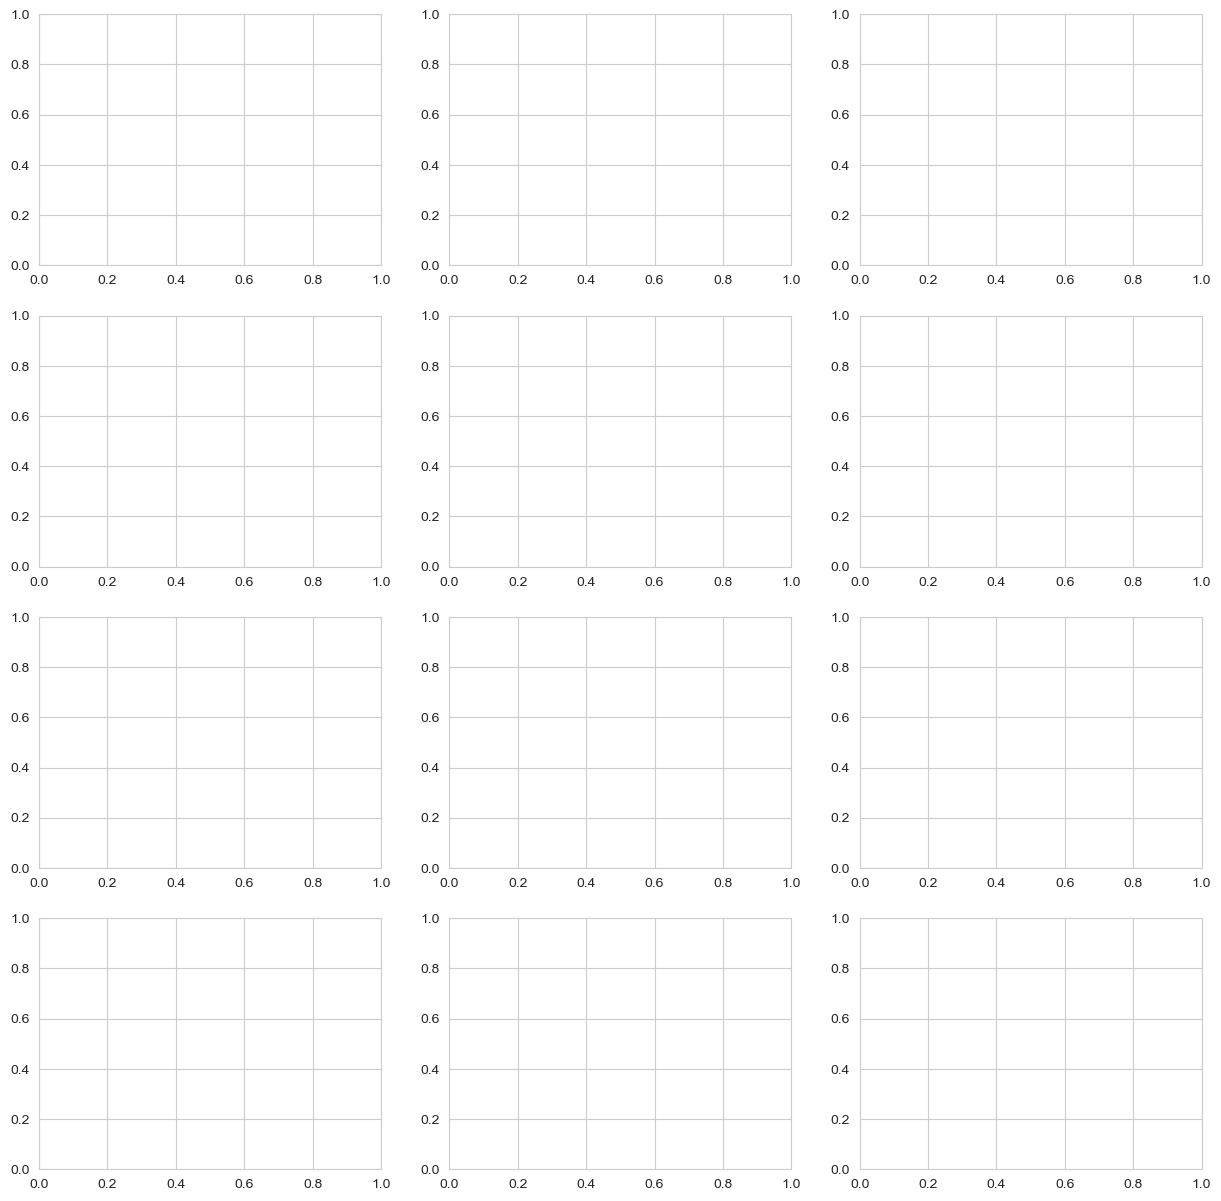

In [258]:
# Plot of canopy cover by mean temp for each sensor by month 

# Plot of canopy cover by mean temp for each sensor by month 

# Convert month column to datetime
nightday_agg['month'] = pd.to_datetime(nightday_agg['month'].astype(str))

# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15),
                       gridspec_kw={'width_ratios': [1, 1, 1],
                                    'height_ratios': [1, 1, 1, 1]})

nightday_agg['month'] = nightday_agg['month'].dt.to_timestamp()

# Create a list of unique months
months = nightday_agg['month'].dt.month.unique()

for ax, month in zip(axs.flat, months):
    month = int(month)
    # Filter the dataframe by the current month
    month_df = nightday_agg[nightday_agg['month'].dt.month == month]
    # Create a scatter plot
    sns.scatterplot(x=month_df['cc_per_30'], y=month_df.iloc[:, 5], hue=month_df['Time of Day'],ax=ax)
    # Set the title for the current subplot
    ax.set_title(month)
    # Set the y-axis label
    ax.set_yl
    # Set the x-axis ticks and labels
    ax.set_xticks(range(0, 60, 10))
    ax.set_xticklabels(range(0, 60, 10))
    # Label the x-axis
    ax.set_xlabel('Canopy Cover(%)')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)


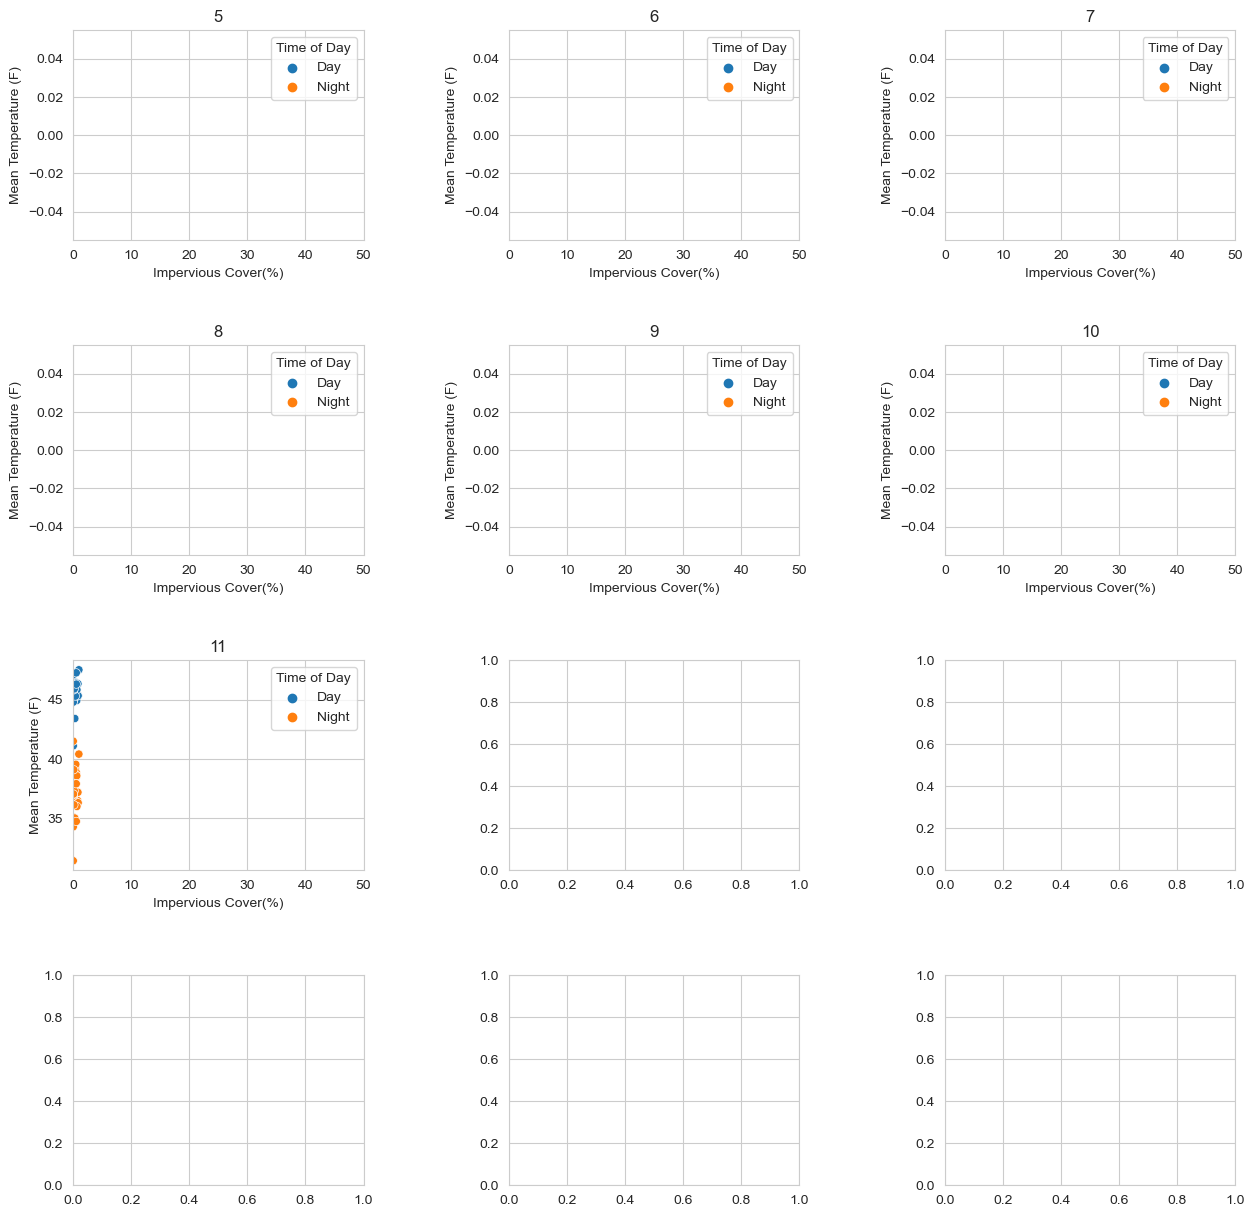

In [247]:
# Plot of impervious cover by mean temp for each sensor by month 
#nightday_agg['cc_per_30'] = nightday_agg['cc_per_30'].astype(float)
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15),
                       gridspec_kw={'width_ratios': [1, 1, 1],
                                    'height_ratios': [1, 1, 1, 1]})

# Create a list of unique months
months = nightday_agg['month'].unique()

# Iterate over the subplots and the months
for ax, month in zip(axs.flat, months):
    # Filter the dataframe by the current month
    month_df = nightday_agg[nightday_agg['month'] == month]
    # Create a scatter plot
    sns.scatterplot(x=month_df['ic_per_30'], y=month_df.iloc[:, 5], hue=month_df['Time of Day'],ax=ax)
    # Set the title for the current subplot
    ax.set_title(month)
    # Set the y-axis label
    ax.set_ylabel("Mean Temperature (F)")
    # Set the x-axis ticks and labels
    ax.set_xticks(range(0, 60, 10))
    ax.set_xticklabels(range(0, 60, 10))
    # Label the x-axis
    ax.set_xlabel('Impervious Cover(%)')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig('ic_per30.png')

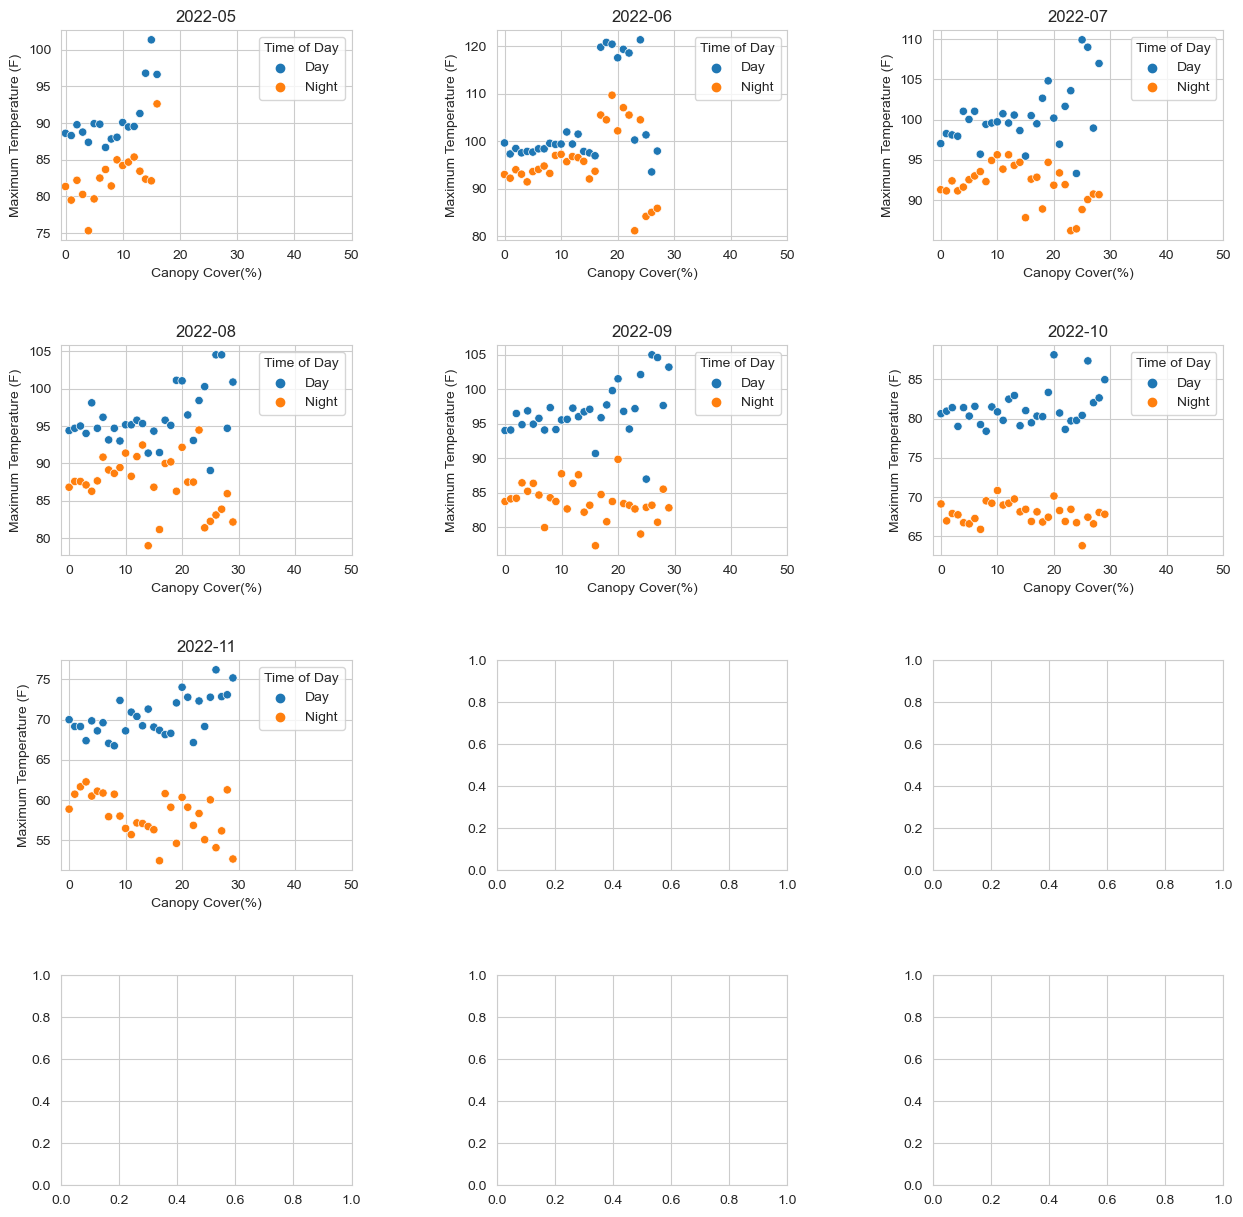

In [166]:
# Plot of canopy cover by maximum temp for each sensor by month 
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15),
                       gridspec_kw={'width_ratios': [1, 1, 1],
                                    'height_ratios': [1, 1, 1, 1]})

# Create a list of unique months
months = nightday_agg['month'].unique()

# Iterate over the subplots and the months
for ax, month in zip(axs.flat, months):
    # Filter the dataframe by the current month
    month_df = nightday_agg[nightday_agg['month'] == month]
    # Create a scatter plot
    sns.scatterplot(x=month_df['cc_per_30'], y=month_df.iloc[:, 7], hue=month_df['Time of Day'],ax=ax)
    # Set the title for the current subplot
    ax.set_title(month)
    # Set the y-axis label
    ax.set_ylabel("Maximum Temperature (F)")
    # Set the x-axis ticks and labels
    ax.set_xticks(range(0, 60, 10))
    ax.set_xticklabels(range(0, 60, 10))
    # Label the x-axis
    ax.set_xlabel('Canopy Cover(%)')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

#Export figure 
plt.savefig('cc_per30_max.png')

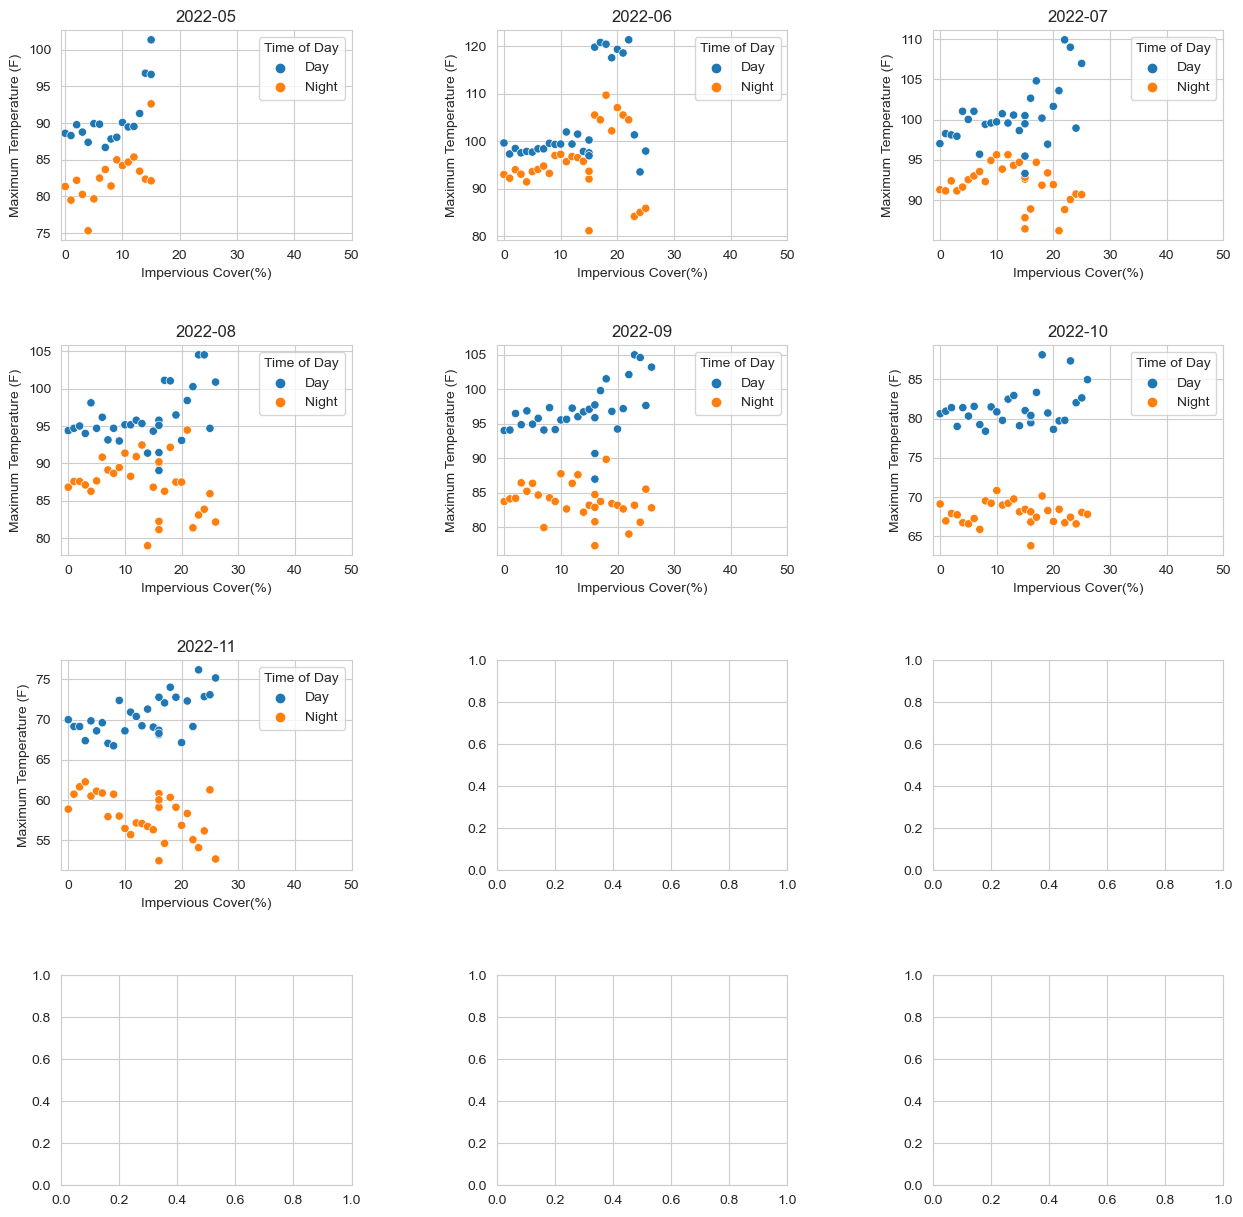

In [169]:
# Plot of impervious cover by max temp for each sensor by month 
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15),
                       gridspec_kw={'width_ratios': [1, 1, 1],
                                    'height_ratios': [1, 1, 1, 1]})

# Create a list of unique months
months = nightday_agg['month'].unique()

# Iterate over the subplots and the months
for ax, month in zip(axs.flat, months):
    # Filter the dataframe by the current month
    month_df = nightday_agg[nightday_agg['month'] == month]
    # Create a scatter plot
    sns.scatterplot(x=month_df['ic_per_30'], y=month_df.iloc[:, 7], hue=month_df['Time of Day'],ax=ax)
    # Set the title for the current subplot
    ax.set_title(month)
    # Set the y-axis label
    ax.set_ylabel("Maximum Temperature (F)")
    # Set the x-axis ticks and labels
    ax.set_xticks(range(0, 60, 10))
    ax.set_xticklabels(range(0, 60, 10))
    # Label the x-axis
    ax.set_xlabel('Impervious Cover(%)')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.savefig('ic_per30_max.png')

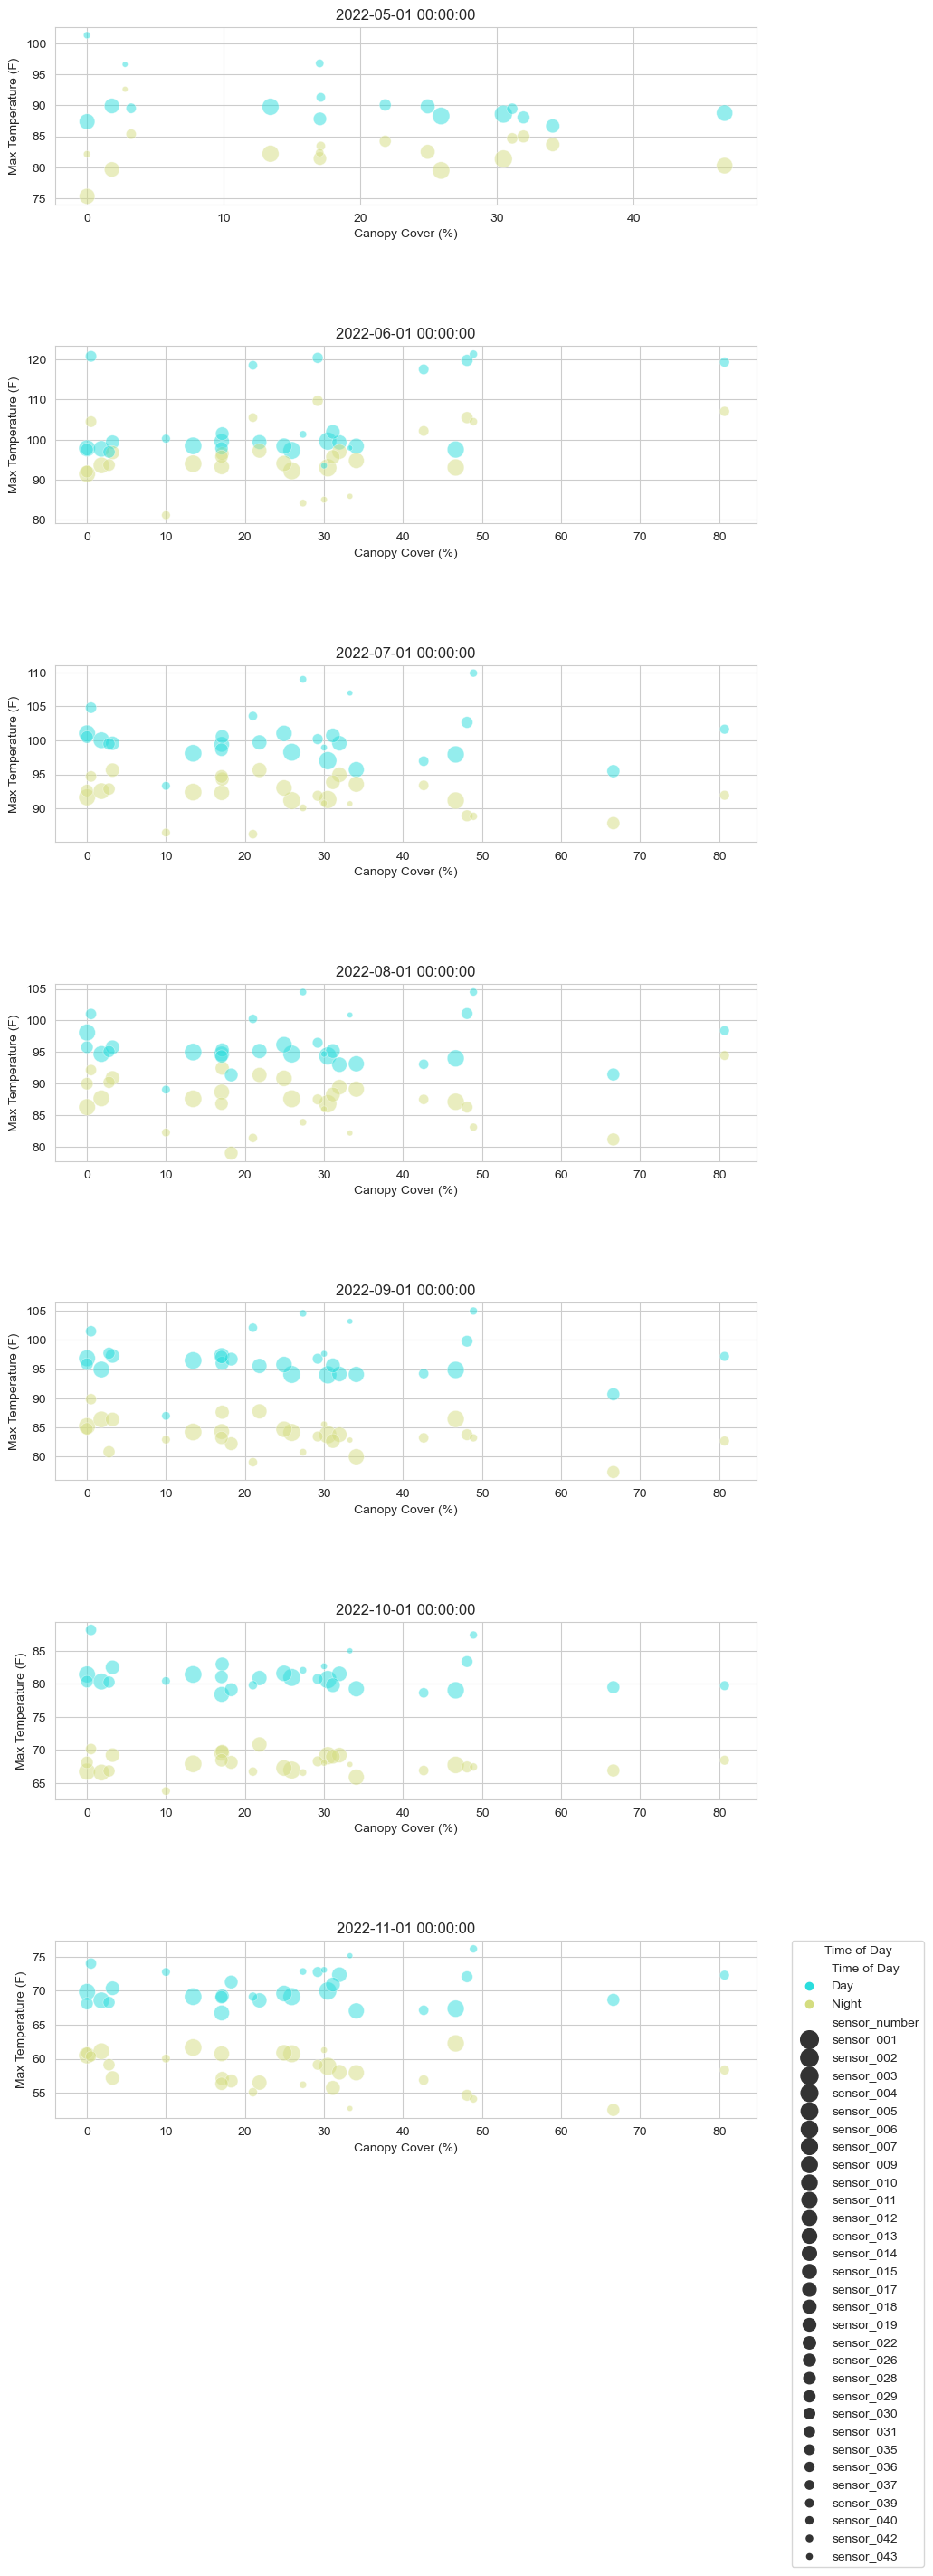

In [285]:
# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))

i = 0
for name, group in grouped:
    sns.scatterplot(x='cc_per_30m',y=group.iloc[:, 7],hue='Time of Day',data=group,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',size='sensor_number',sizes=(20,200),ax=axs[i])
    axs[i].set_title(name)
    axs[i].legend().remove()
    axs[i].set_xlabel('Canopy Cover (%)')
    axs[i].set_ylabel('Max Temperature (F)')
    i += 1
    
plt.legend(title = "Time of Day",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
plt.subplots_adjust(hspace=0.8)
plt.show()
#fig.savefig('cc_daynight_sensor.png')

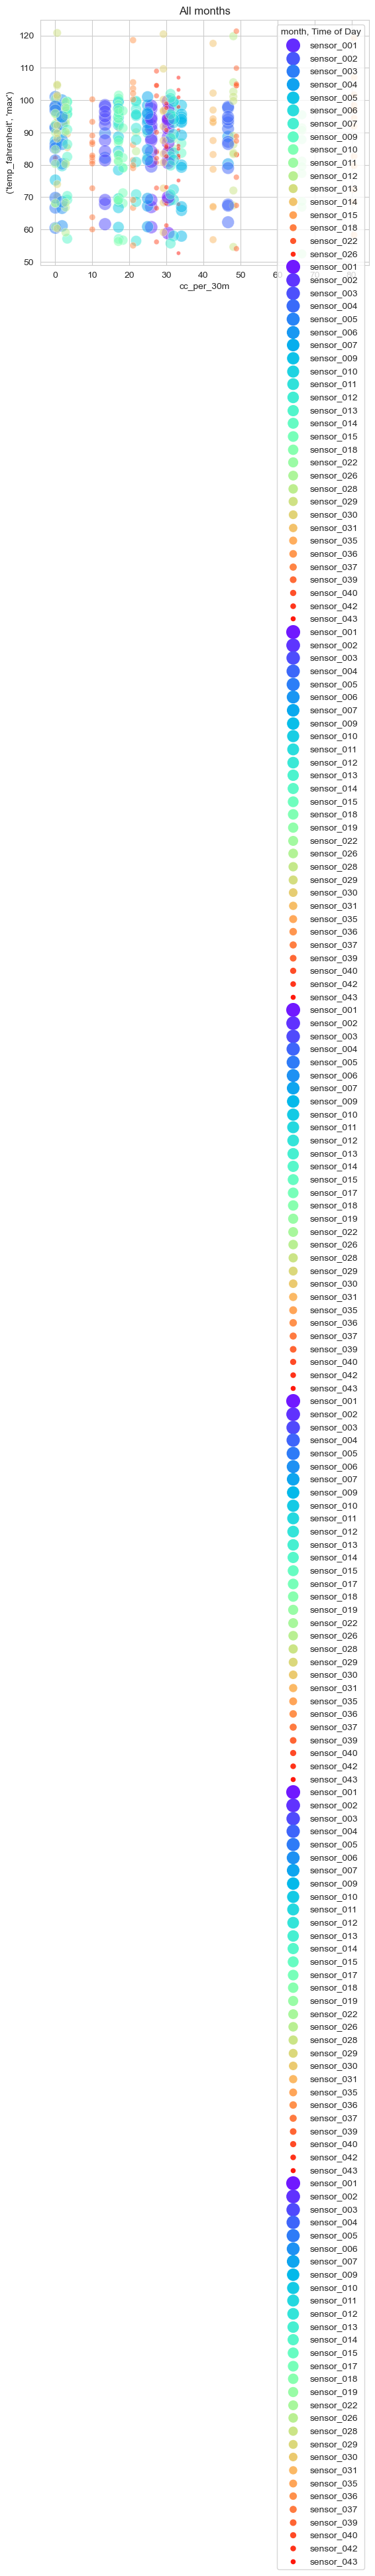

In [277]:


# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# create a scatter plot for each group
for name, group in grouped:
    sns.scatterplot(x='cc_per_30m',y=group.iloc[:, 7],hue='sensor_number',data=group,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',hue_order=group['sensor_number'].sort_values().unique(),size='sensor_number',size_order=group['sensor_number'].sort_values().unique(),sizes=(20,200))
    plt.title('All months')
    plt.legend().remove()

plt.legend(title = "month, Time of Day")
plt.show()
#plt.savefig('ic_per30_ma.png')

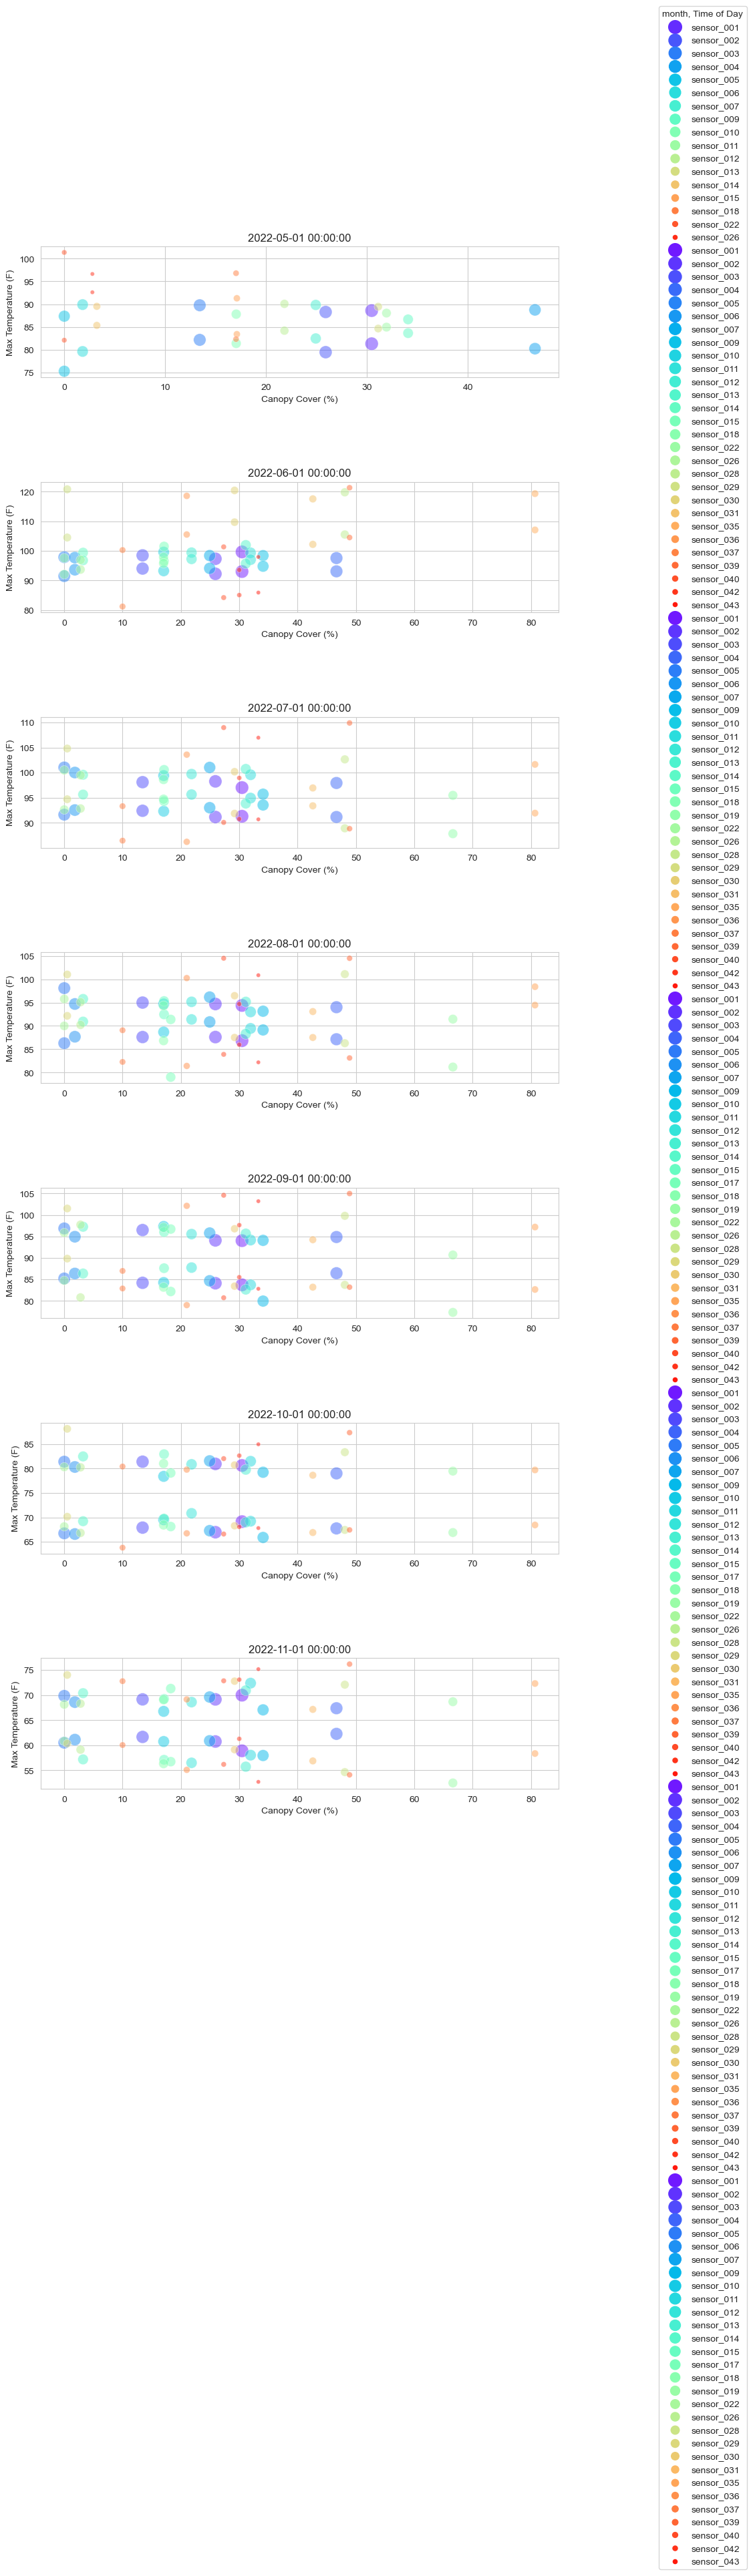

In [297]:

# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))

i = 0
for name, group in grouped:
    sns.scatterplot(x='cc_per_30m',y=group.iloc[:, 7],hue='sensor_number',data=group,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',hue_order=group['sensor_number'].sort_values().unique(),size='sensor_number',size_order=group['sensor_number'].sort_values().unique(),sizes=(20,200),ax=axs[i])
    axs[i].set_title(name)
    axs[i].legend().remove()
    axs[i].set_xlabel('Canopy Cover (%)')
    axs[i].set_ylabel('Max Temperature (F)')
    i += 1

fig.legend(title = "month, Time of Day",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
plt.subplots_adjust(hspace=0.8)
plt.show()
#fig.savefig('cc_sensor.png')

# # extract the legend from the current axis
# legend = axs[0].legend(title="Time of Day",loc='center')

# # save the legend as an image
# legend.figure.savefig("legend_sensor.png", bbox_inches='tight')



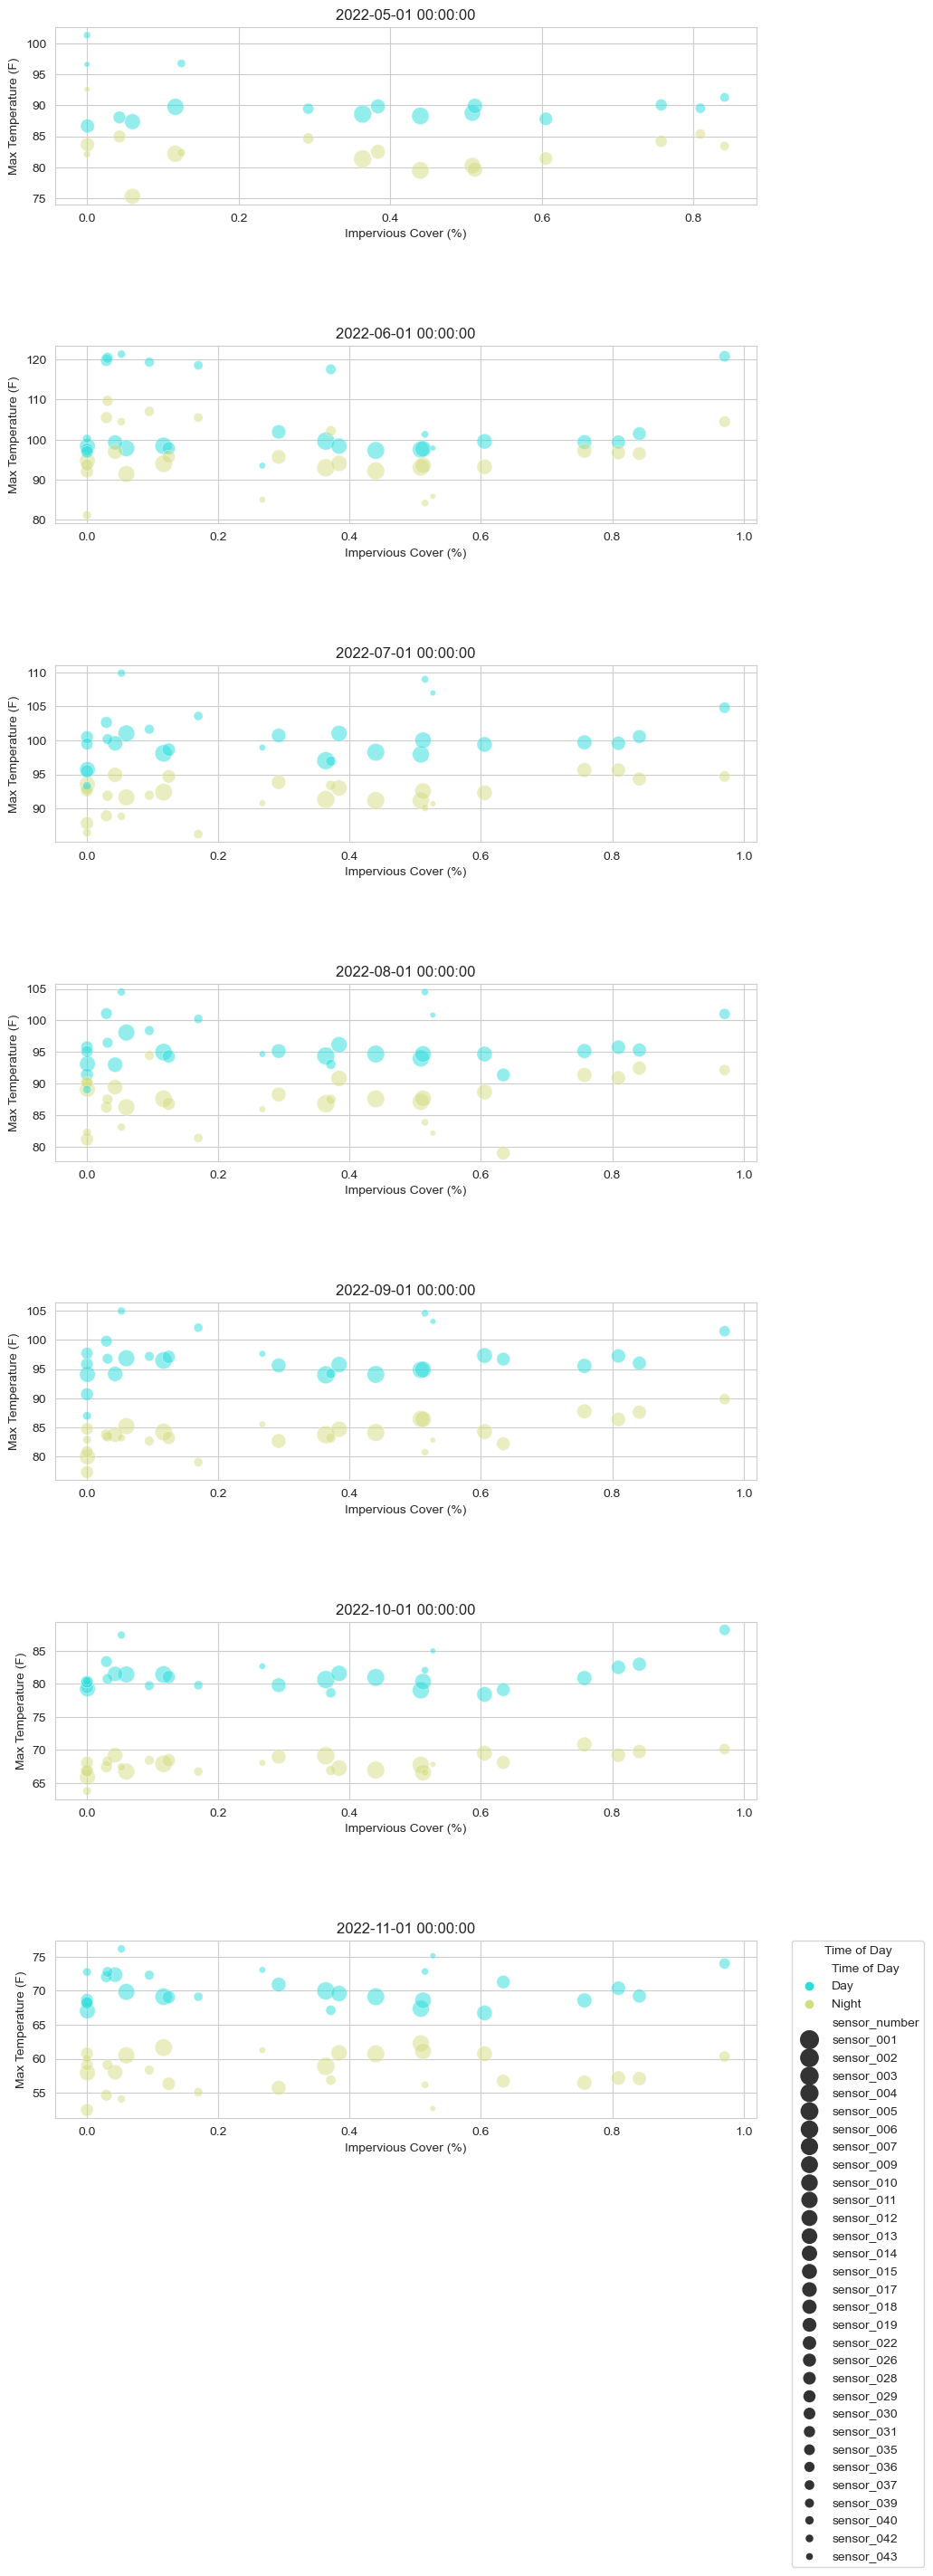

In [289]:

# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))

i = 0
for name, group in grouped:
    sns.scatterplot(x='ic_per_30m',y=group.iloc[:, 7],hue='Time of Day',data=group,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',size='sensor_number',sizes=(20,200),ax=axs[i])
    axs[i].set_title(name)
    axs[i].legend().remove()
    axs[i].set_xlabel('Impervious Cover (%)')
    axs[i].set_ylabel('Max Temperature (F)')
    i += 1
    
plt.legend(title = "Time of Day",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
plt.subplots_adjust(hspace=0.8)
plt.show()
#fig.savefig('ic_daynight_sensor.png')

# extract the legend from the current axis
legend = axs[0].legend(title="Time of Day",loc='center')

# save the legend as an image
legend.figure.savefig("legend_ic_daynight_.png", bbox_inches='tight')


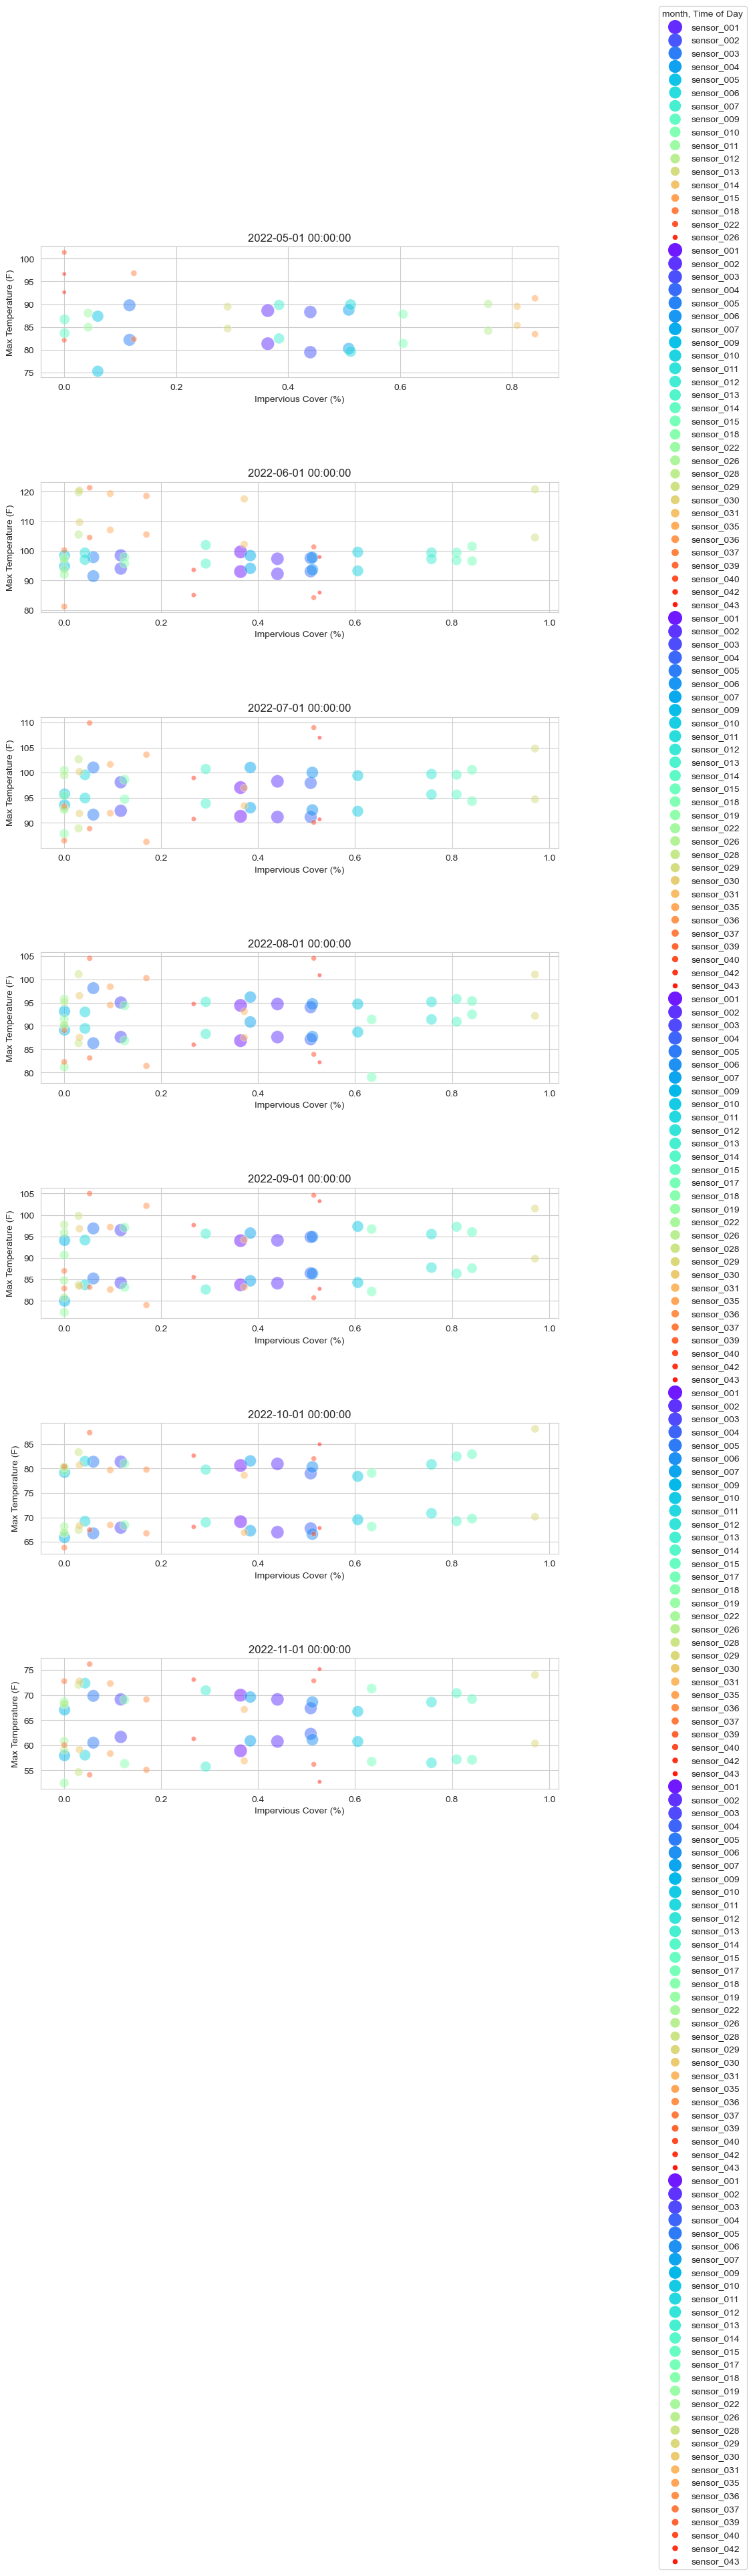

In [282]:

# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))

i = 0
for name, group in grouped:
    sns.scatterplot(x='ic_per_30m',y=group.iloc[:, 7],hue='sensor_number',data=group,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',hue_order=group['sensor_number'].sort_values().unique(),size='sensor_number',size_order=group['sensor_number'].sort_values().unique(),sizes=(20,200),ax=axs[i])
    axs[i].set_title(name)
    axs[i].legend().remove()
    axs[i].set_xlabel('Impervious Cover (%)')
    axs[i].set_ylabel('Max Temperature (F)')
    i += 1

fig.legend(title = "month, Time of Day",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
plt.subplots_adjust(hspace=0.8)
plt.show()
fig.savefig('ic_sensor.png')

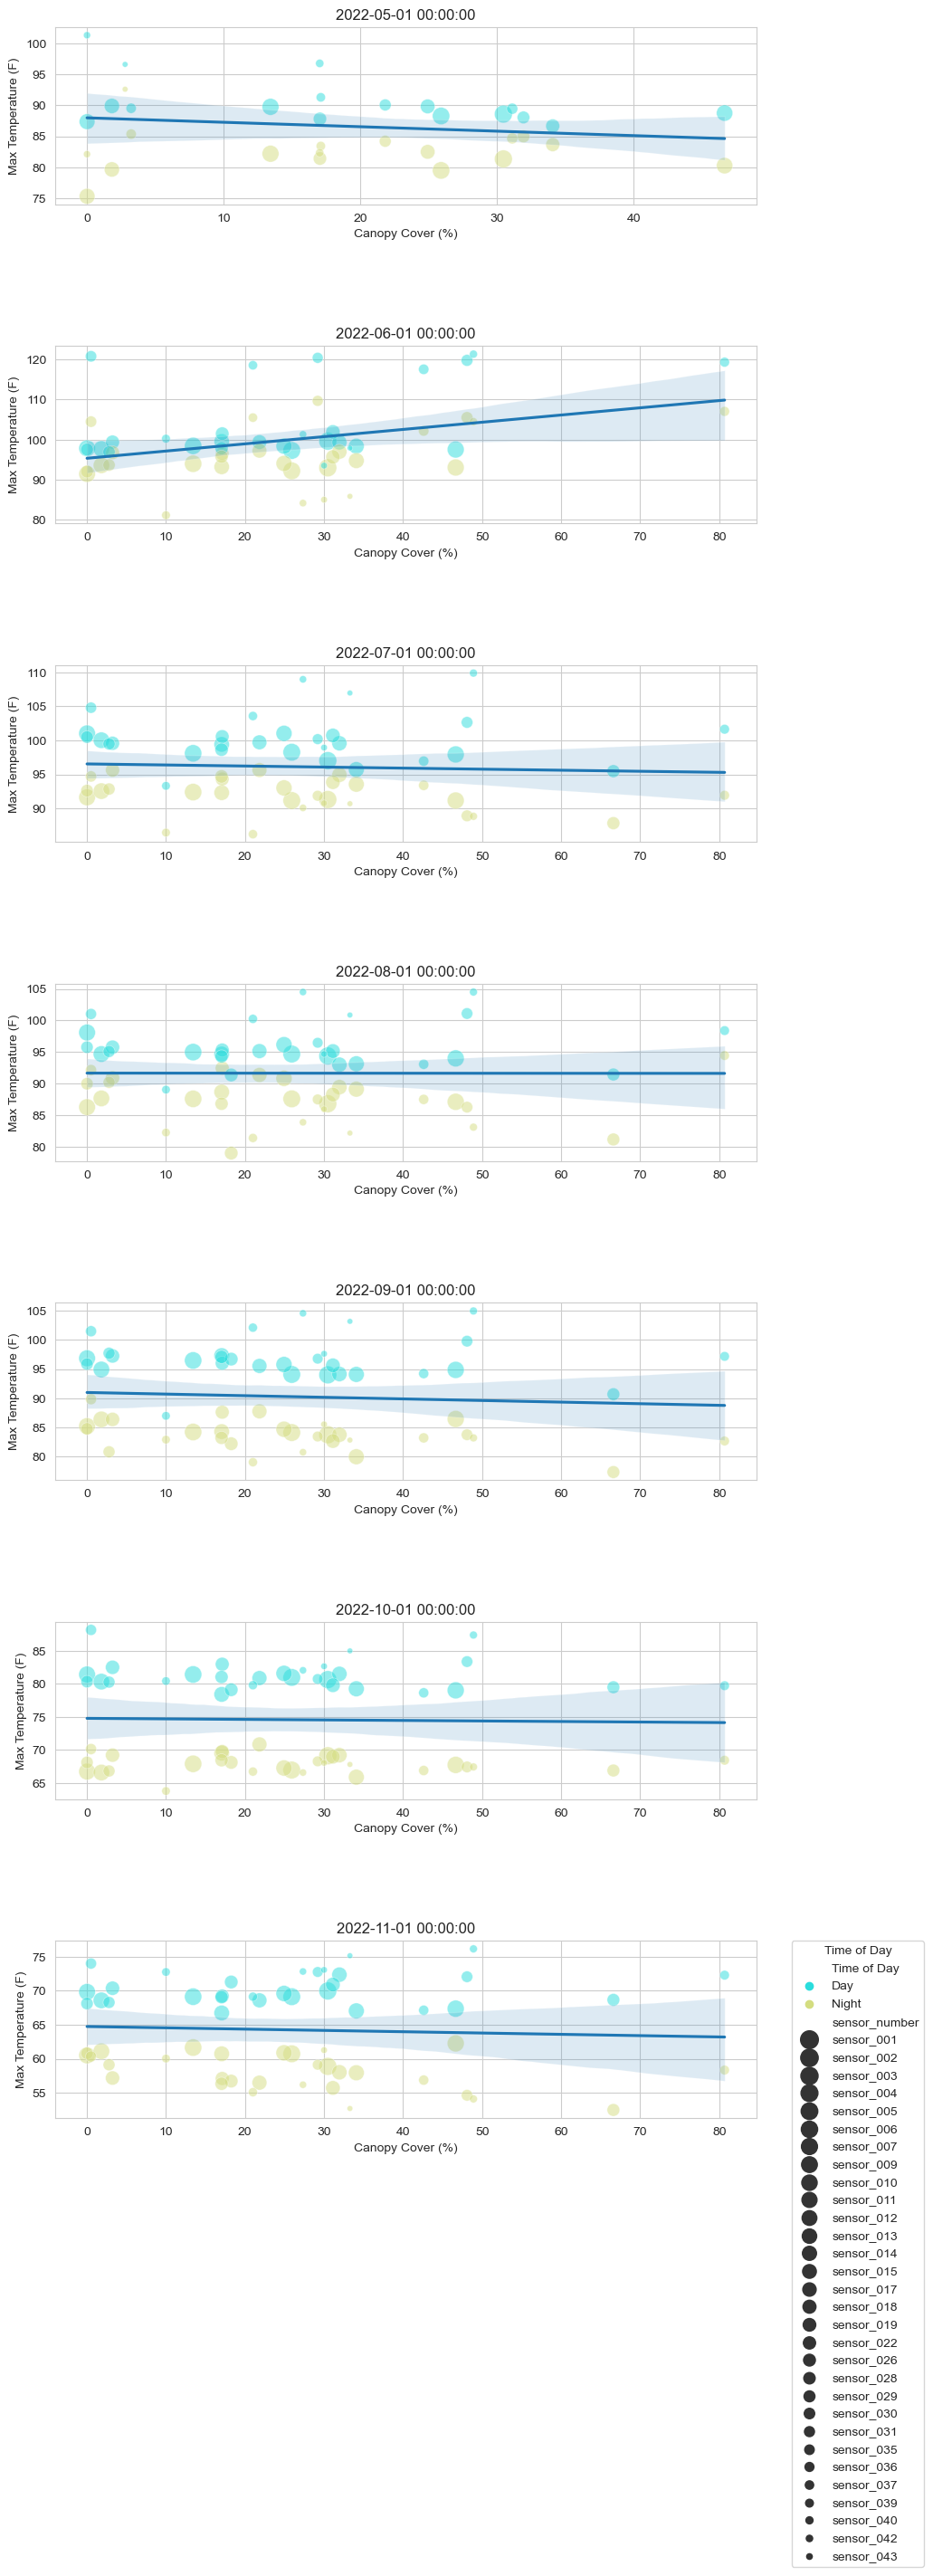

In [293]:
# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))

i = 0
for name, group in grouped:
    sns.scatterplot(x='cc_per_30m',y=group.iloc[:, 7],hue='Time of Day',data=group,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',size='sensor_number',sizes=(20,200),ax=axs[i])
    sns.regplot(x='cc_per_30m',y=group.iloc[:, 7],data=group,ax=axs[i], scatter=False)
    axs[i].set_title(name)
    axs[i].legend().remove()
    axs[i].set_xlabel('Canopy Cover (%)')
    axs[i].set_ylabel('Max Temperature (F)')
    i += 1
    
plt.legend(title = "Time of Day",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
plt.subplots_adjust(hspace=0.8)
plt.show()


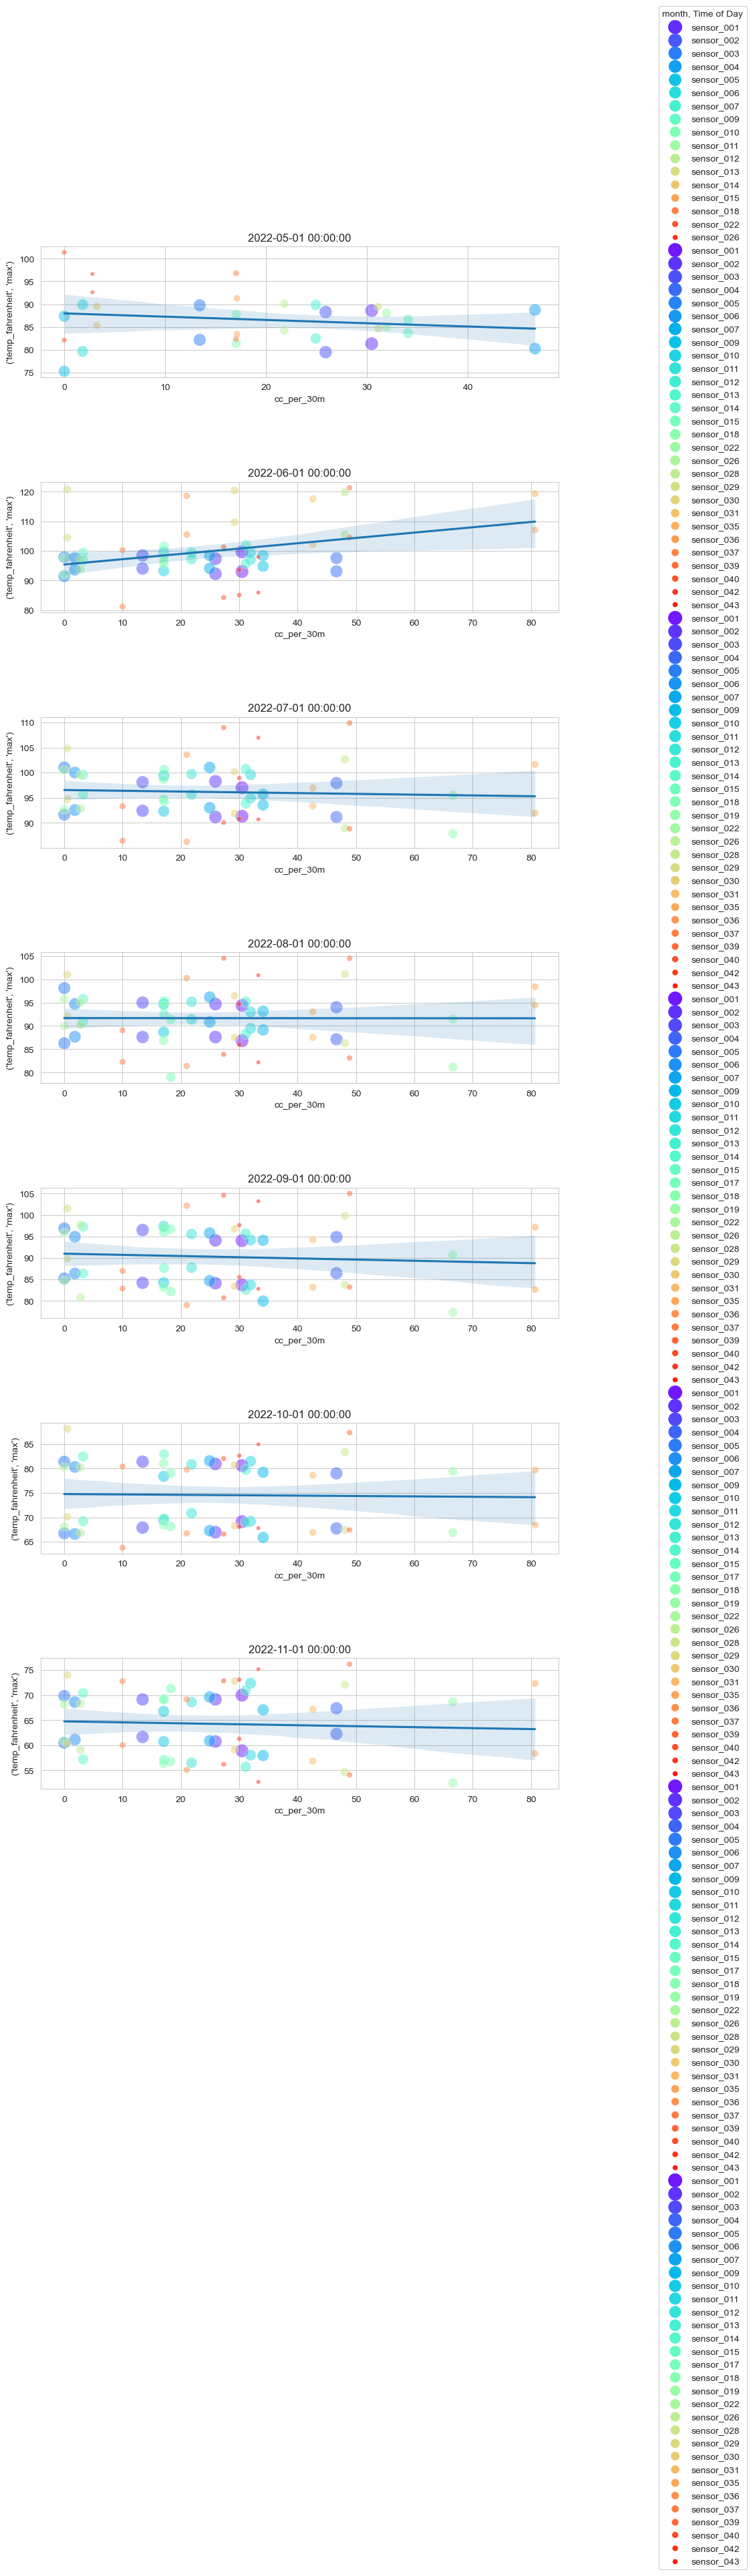

In [295]:
# group the dataframe by month
grouped = nightday_agg.groupby(['month'])

# create a subplot for each group
fig, axs = plt.subplots(nrows=len(grouped), figsize=(10,30))

i = 0
for name, group in grouped:
    sns.scatterplot(x='cc_per_30m',y=group.iloc[:, 7],hue='sensor_number',data=group,x_jitter=True,y_jitter=True,alpha=0.5,palette='rainbow',hue_order=group['sensor_number'].sort_values().unique(),size='sensor_number',size_order=group['sensor_number'].sort_values().unique(),sizes=(20,200),ax=axs[i])
    axs[i].set_title(name)
    axs[i].legend().remove()
    axs[i].set_xlabel('Canopy Cover (%)')
    axs[i].set_ylabel('Max Temperature (F)')
    sns.regplot(x='cc_per_30m',y=group.iloc[:, 7],data=group,ax=axs[i],scatter=False)
    i += 1

fig.legend(title = "month, Time of Day",bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)
plt.subplots_adjust(hspace=0.8)
plt.show()
